In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf

# Intra-day historical values
interval: 30min 
periode: May 2017 to April 2020

In [2]:
sobey = pd.read_csv('emp-a.to_intraday-30min_historical-data-04-06-2020.csv')

In [132]:
loblaw = pd.read_csv('l.to_intraday-30min_historical-data-04-06-2020.csv')

In [134]:
metro = pd.read_csv('mru.to_intraday-30min_historical-data-04-06-2020.csv')

## Data cleaning

Sobeys

In [3]:
# Efface le footer du csv de barchart.com
sobey.drop(labels= 9999, inplace= True)

# Set datetime index
sobey.index = pd.to_datetime(sobey.Time)
sobey.sort_index(inplace= True)
#sobey.set_index('Time', inplace= True)

# Nouvelles colonnes
sobey['Average'] = ( sobey.High + sobey.Low ) / 2
sobey['Week']= sobey.index.week.astype('str')
sobey['Week'] = sobey['Week'].str.slice_replace(0, 0, 'W')
sobey['Quarter']= sobey.index.quarter.astype('str')
sobey['Quarter'] = sobey['Quarter'].str.slice_replace(0, 0, 'Q')

# Changer les data types
sobey["Volume"] = sobey["Volume"].astype('int32')
sobey["Week"] = sobey["Week"].astype('category')
sobey["Quarter"] = sobey["Quarter"].astype('category')

Loblaws

In [133]:
# Efface le footer du csv de barchart.com
loblaw.drop(labels= 9999, inplace= True)

# Set datetime index
loblaw.index = pd.to_datetime(loblaw.Time)
loblaw.sort_index(inplace= True)

# Nouvelles colonnes
loblaw['Average'] = ( loblaw.High + loblaw.Low ) / 2
loblaw['Week']= loblaw.index.week.astype('str')
loblaw['Week'] = loblaw['Week'].str.slice_replace(0, 0, 'W')
loblaw['Quarter']= loblaw.index.quarter.astype('str')
loblaw['Quarter'] = loblaw['Quarter'].str.slice_replace(0, 0, 'Q')

# Changer les data types
loblaw["Volume"] = loblaw["Volume"].astype('int32')
loblaw["Week"] = loblaw["Week"].astype('category')
loblaw["Quarter"] = loblaw["Quarter"].astype('category')

Metro

In [135]:
# Efface le footer du csv de barchart.com
metro.drop(labels= 9999, inplace= True)

# Set datetime index
metro.index = pd.to_datetime(metro.Time)
metro.sort_index(inplace= True)

# Nouvelles colonnes
metro['Average'] = ( metro.High + metro.Low ) / 2
metro['Week']= metro.index.week.astype('str')
metro['Week'] = metro['Week'].str.slice_replace(0, 0, 'W')
metro['Quarter']= metro.index.quarter.astype('str')
metro['Quarter'] = metro['Quarter'].str.slice_replace(0, 0, 'Q')

# Changer les data types
metro["Volume"] = metro["Volume"].astype('int32')
metro["Week"] = metro["Week"].astype('category')
metro["Quarter"] = metro["Quarter"].astype('category')

#### Quick viz for off patern

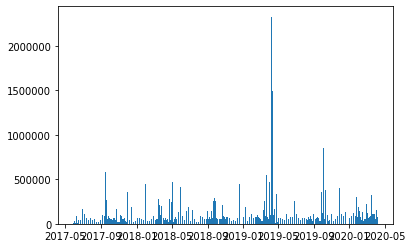

In [7]:
plt.bar(sobey.index, sobey['Volume'])
plt.show()

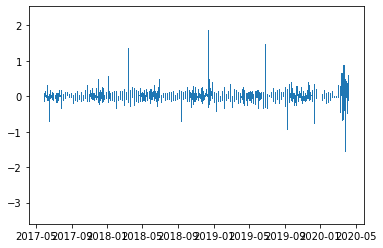

In [8]:
plt.bar(sobey.index, sobey['Change'])
plt.show()

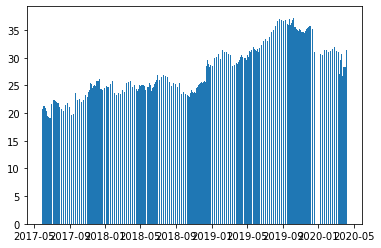

In [10]:
plt.bar(sobey.index, sobey['High'])
plt.show()

## EDA

### Distribution des valeurs Vs Volume de transactions par jour

In [5]:
# Slice les périodes
sobey2018 = sobey['2018']
sobey2018 = sobey2018.drop(columns= ['Time', 'Open', 'Last', 'High', 'Low' ])
sobey2018_Q2 = sobey2018.loc[sobey2018['Quarter'] == 'Q2', ['Average']]
sobey2018_Q2_vol = sobey2018.loc[sobey2018['Quarter'] == 'Q2', ['Volume']]

# Nouv colonne 'doy' (day of year) pour groupby('doy').sum().plot.bar().
sobey2018_Q2_vol['doy'] = sobey2018_Q2_vol.index.dayofyear

# Compter le nb de jours ds un trimestre
#day_count = sobey2018_Q2.groupby(sobey2018_Q2.index.floor('d')).size()
#len_Q = day_count.shape[0]

# Utiliser le day of year comme index au lieu de dt.index
#day_sum_vol.reset_index(inplace= True)
#del day_sum_vol['Time']
#day_sum_vol.set_index('Day', inplace= True)
#day_sum_vol.head()

In [136]:
# Slice les périodes
loblaw2018 = loblaw['2018']
loblaw2018 = loblaw2018.drop(columns= ['Time', 'Open', 'Last', 'High', 'Low'])
loblaw2018_Q2 = loblaw2018.loc[loblaw2018['Quarter'] == 'Q2', ['Average']]
loblaw2018_Q2_vol = loblaw2018.loc[loblaw2018['Quarter'] == 'Q2', ['Volume']]

# Nouv colonne 'doy' (day of year) pour groupby('doy').sum().plot.bar().
loblaw2018_Q2_vol['doy'] = loblaw2018_Q2_vol.index.dayofyear

In [137]:
# Slice les périodes
metro2018 = metro['2018']
metro2018 = metro2018.drop(columns= ['Time', 'Open', 'Last', 'High', 'Low'])
metro2018_Q2 = metro2018.loc[metro2018['Quarter'] == 'Q2', ['Average']]
metro2018_Q2_vol = metro2018.loc[metro2018['Quarter'] == 'Q2', ['Volume']]

# Nouv colonne 'doy' (day of year) pour groupby('doy').sum().plot.bar().
metro2018_Q2_vol['doy'] = metro2018_Q2_vol.index.dayofyear

In [32]:
sobey2018_Q2.head(2)

Average
Time                        
2018-04-02 09:30:00   25.665
2018-04-02 10:00:00   25.440

In [33]:
sobey2018_Q2_vol.head(2)

Volume  doy
Time                            
2018-04-02 09:30:00   21500   92
2018-04-02 10:00:00   17300   92

In [15]:
np.mean(sobey2018_Q2_vol['Volume'])

32784.23423423423

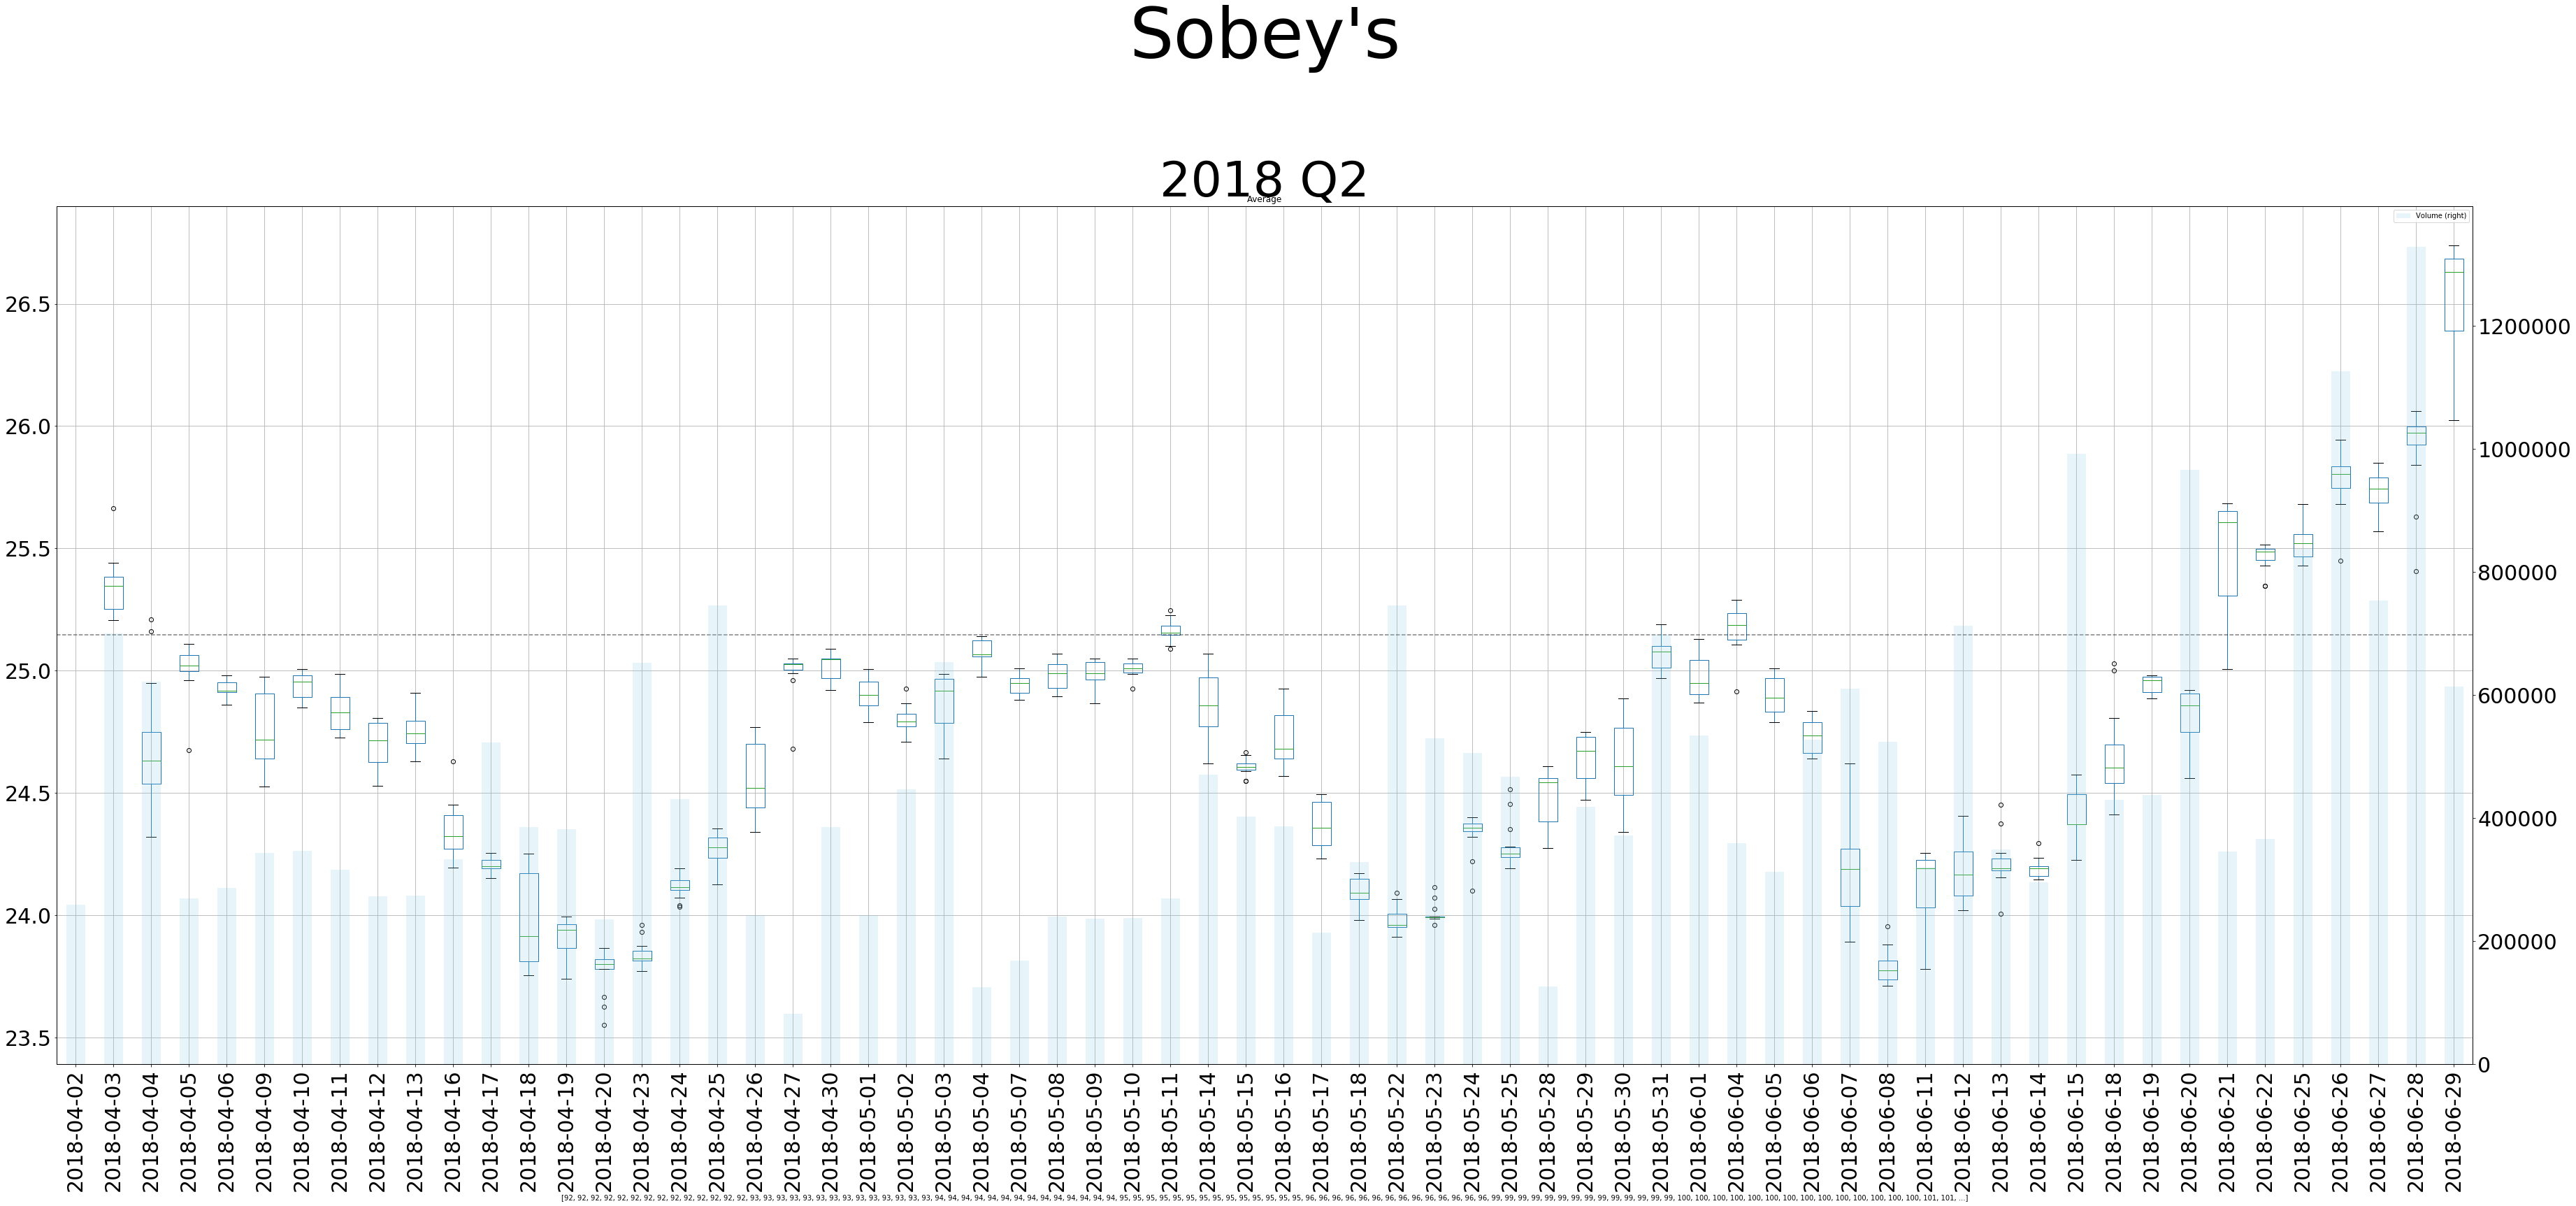

In [24]:
plt.rcParams.update({'axes.titlesize': 'large'})

#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()

ax1= fig.add_subplot(211)
#ax1.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

_ = sobey2018_Q2.boxplot(column='Average', 
                     by= sobey2018_Q2.index.dayofyear, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax1
                     )

ax2 = ax1.twinx()

_ = sobey2018_Q2_vol.groupby('doy').sum().plot.bar(y= 'Volume',
                                               color= 'skyblue', 
                                               figsize= [60, 50],
                                               rot= 90,
                                               fontsize= 30,
                                               ax= ax2,
                                               secondary_y= True,
                                               alpha= 0.2
                                              )

sobey2018_Q2_vol_date = sobey2018_Q2_vol.resample('D').sum()
sobey2018_Q2_vol_date = sobey2018_Q2_vol_date.loc[sobey2018_Q2_vol_date['Volume'] != 0]

xlabel = list(sobey2018_Q2_vol_date.index.date.astype('str'))
locs, labels= plt.xticks()
x_ticks = []
new_xticks= [xlabel.pop(0) for d in locs]

plt.xticks(locs, new_xticks, rotation= 45, horizontalalignment= 'right')

# À finir. Supposé être 32784, mais apparaît mal sur le graphique.
vol_mean = np.mean(sobey2018_Q2_vol['Volume'])
ax2.axhline(y= vol_mean, linestyle='--', color='k', alpha= 0.5)

plt.title('2018 Q2', fontsize= 70)
#plt.grid(b= True, axis= 'both')

plt.suptitle("Sobey's", fontsize= 100)

#plt.savefig('Sobey_2018_Q2.pdf')
plt.show()

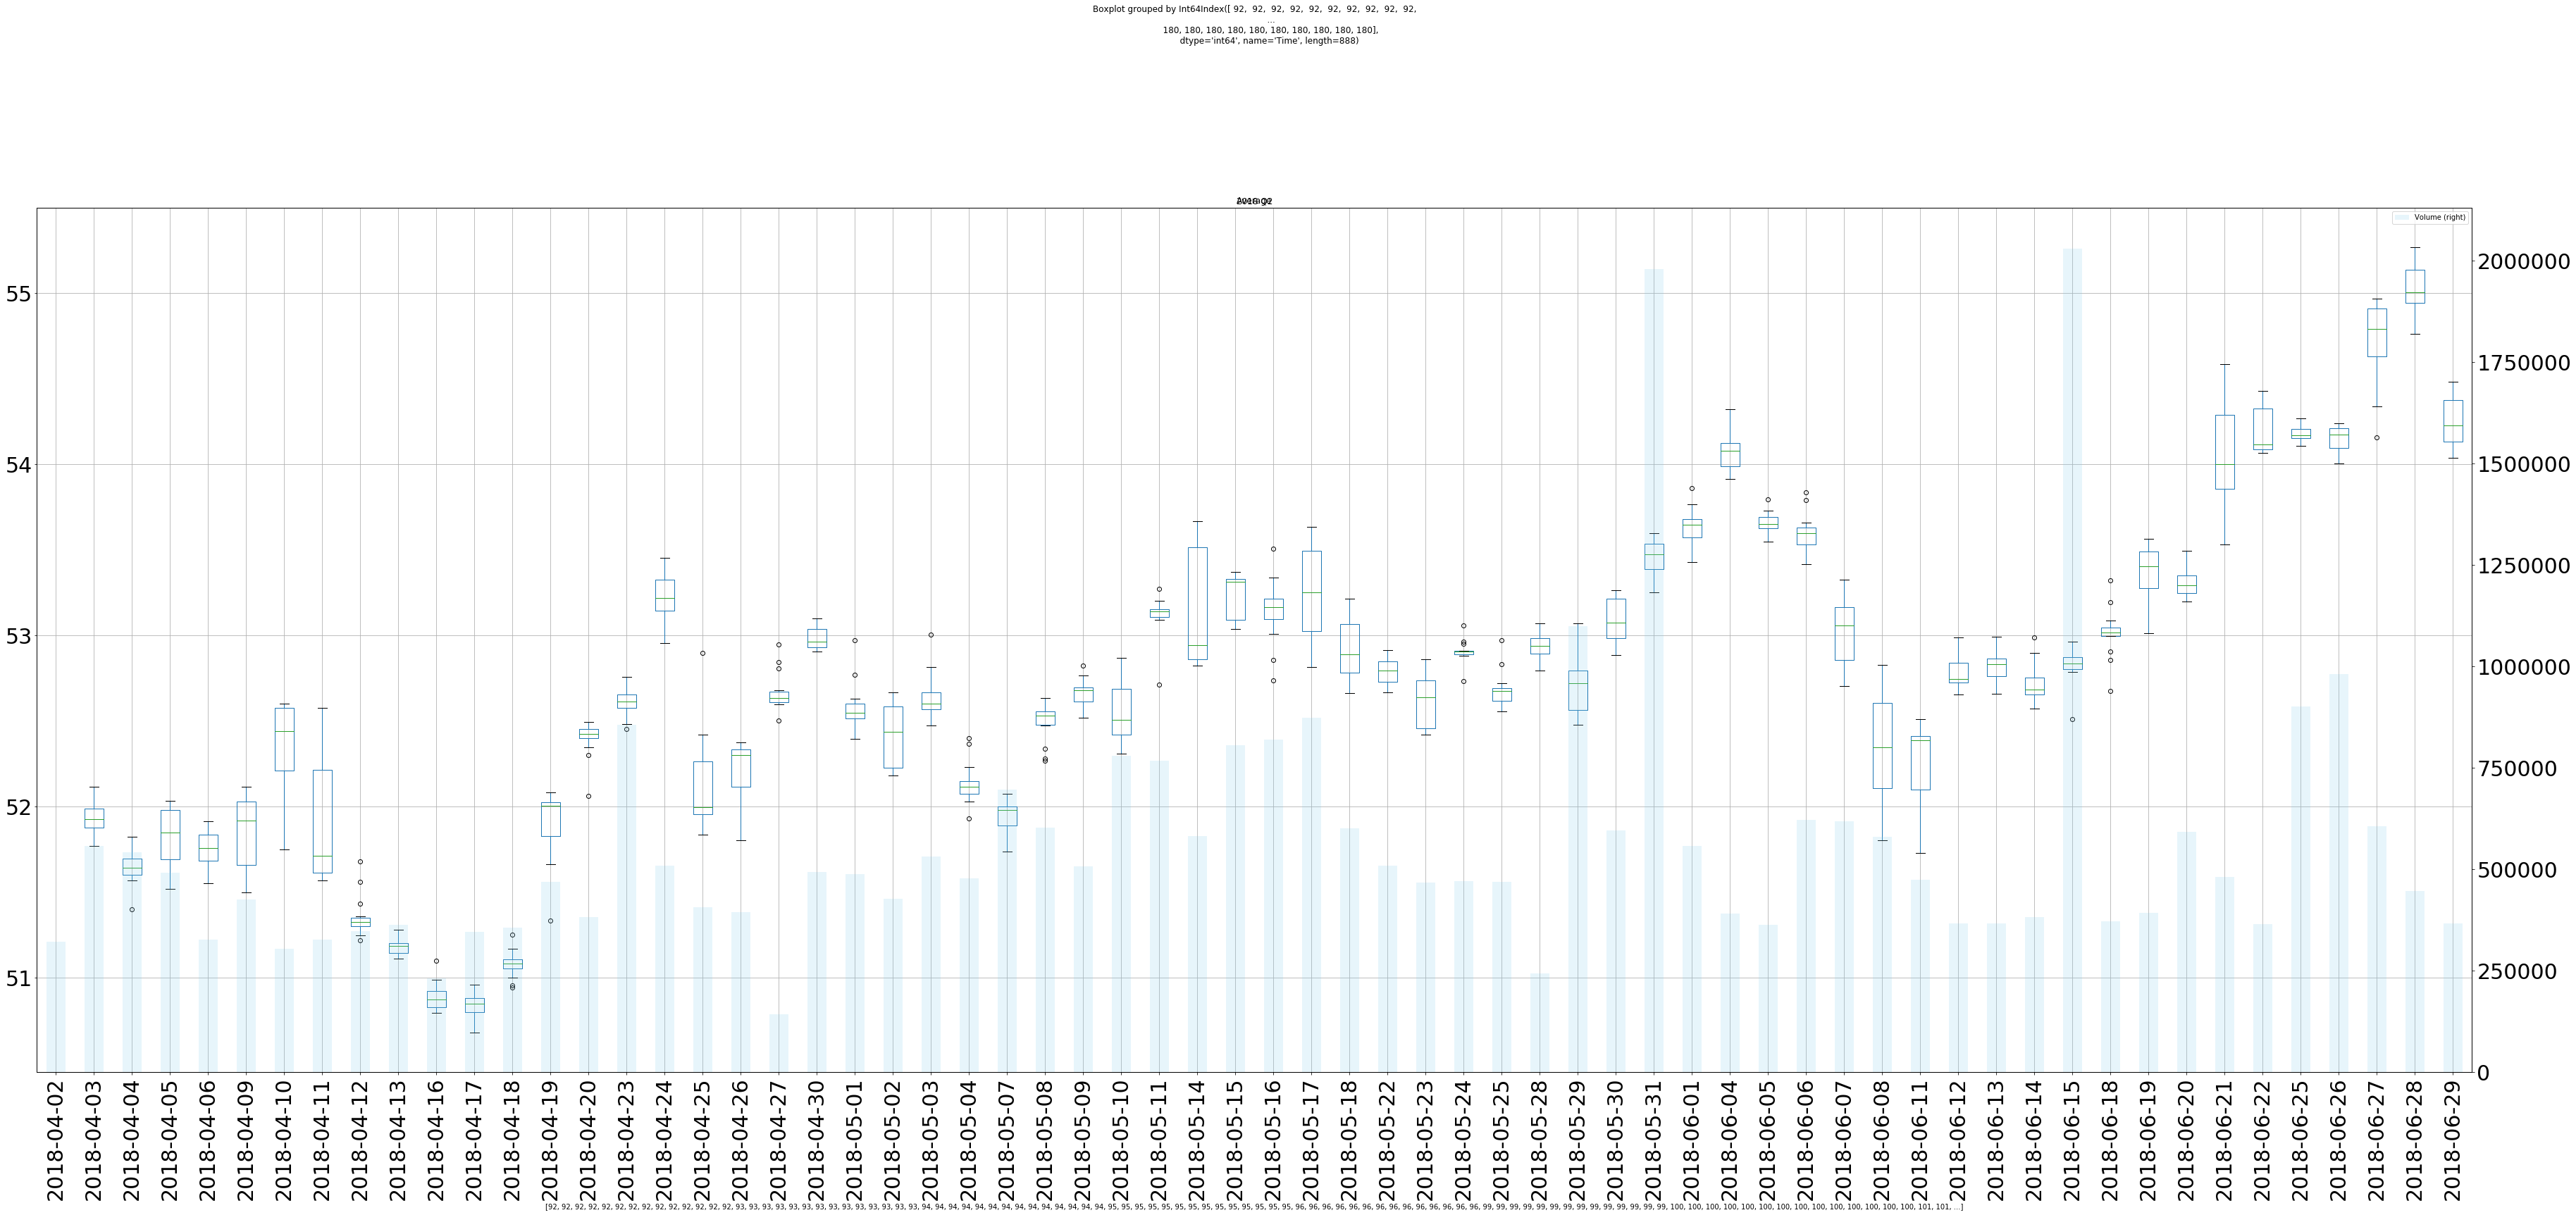

In [140]:
plt.rcParams.update({'axes.titlesize': 'large'})

#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()

ax1= fig.add_subplot(211)
#ax1.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

plt.title('2018 Q2', fontsize= 100)
plt.grid(b= True, axis= 'both')

#plt.suptitle('Volume')

loblaw2018_Q2.boxplot(column='Average', 
                     by= loblaw2018_Q2.index.dayofyear, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax1
                     )

ax2 = ax1.twinx()
plt.title('2018 Q2')

loblaw2018_Q2_vol.groupby('doy').sum().plot.bar(y= 'Volume',
                                               color= 'skyblue', 
                                               figsize= [60, 50],
                                               rot= 90,
                                               fontsize= 30,
                                               ax= ax2,
                                               secondary_y= True,
                                               alpha= 0.2
                                              )

loblaw2018_Q2_vol_date = loblaw2018_Q2_vol.resample('D').sum()
loblaw2018_Q2_vol_date = loblaw2018_Q2_vol_date.loc[loblaw2018_Q2_vol_date['Volume'] != 0]
xlabel = list(loblaw2018_Q2_vol_date.index.date.astype('str'))
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[xlabel.pop(0) for d in locs]
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')

plt.savefig('loblaw_2018_Q2.pdf')
plt.show()

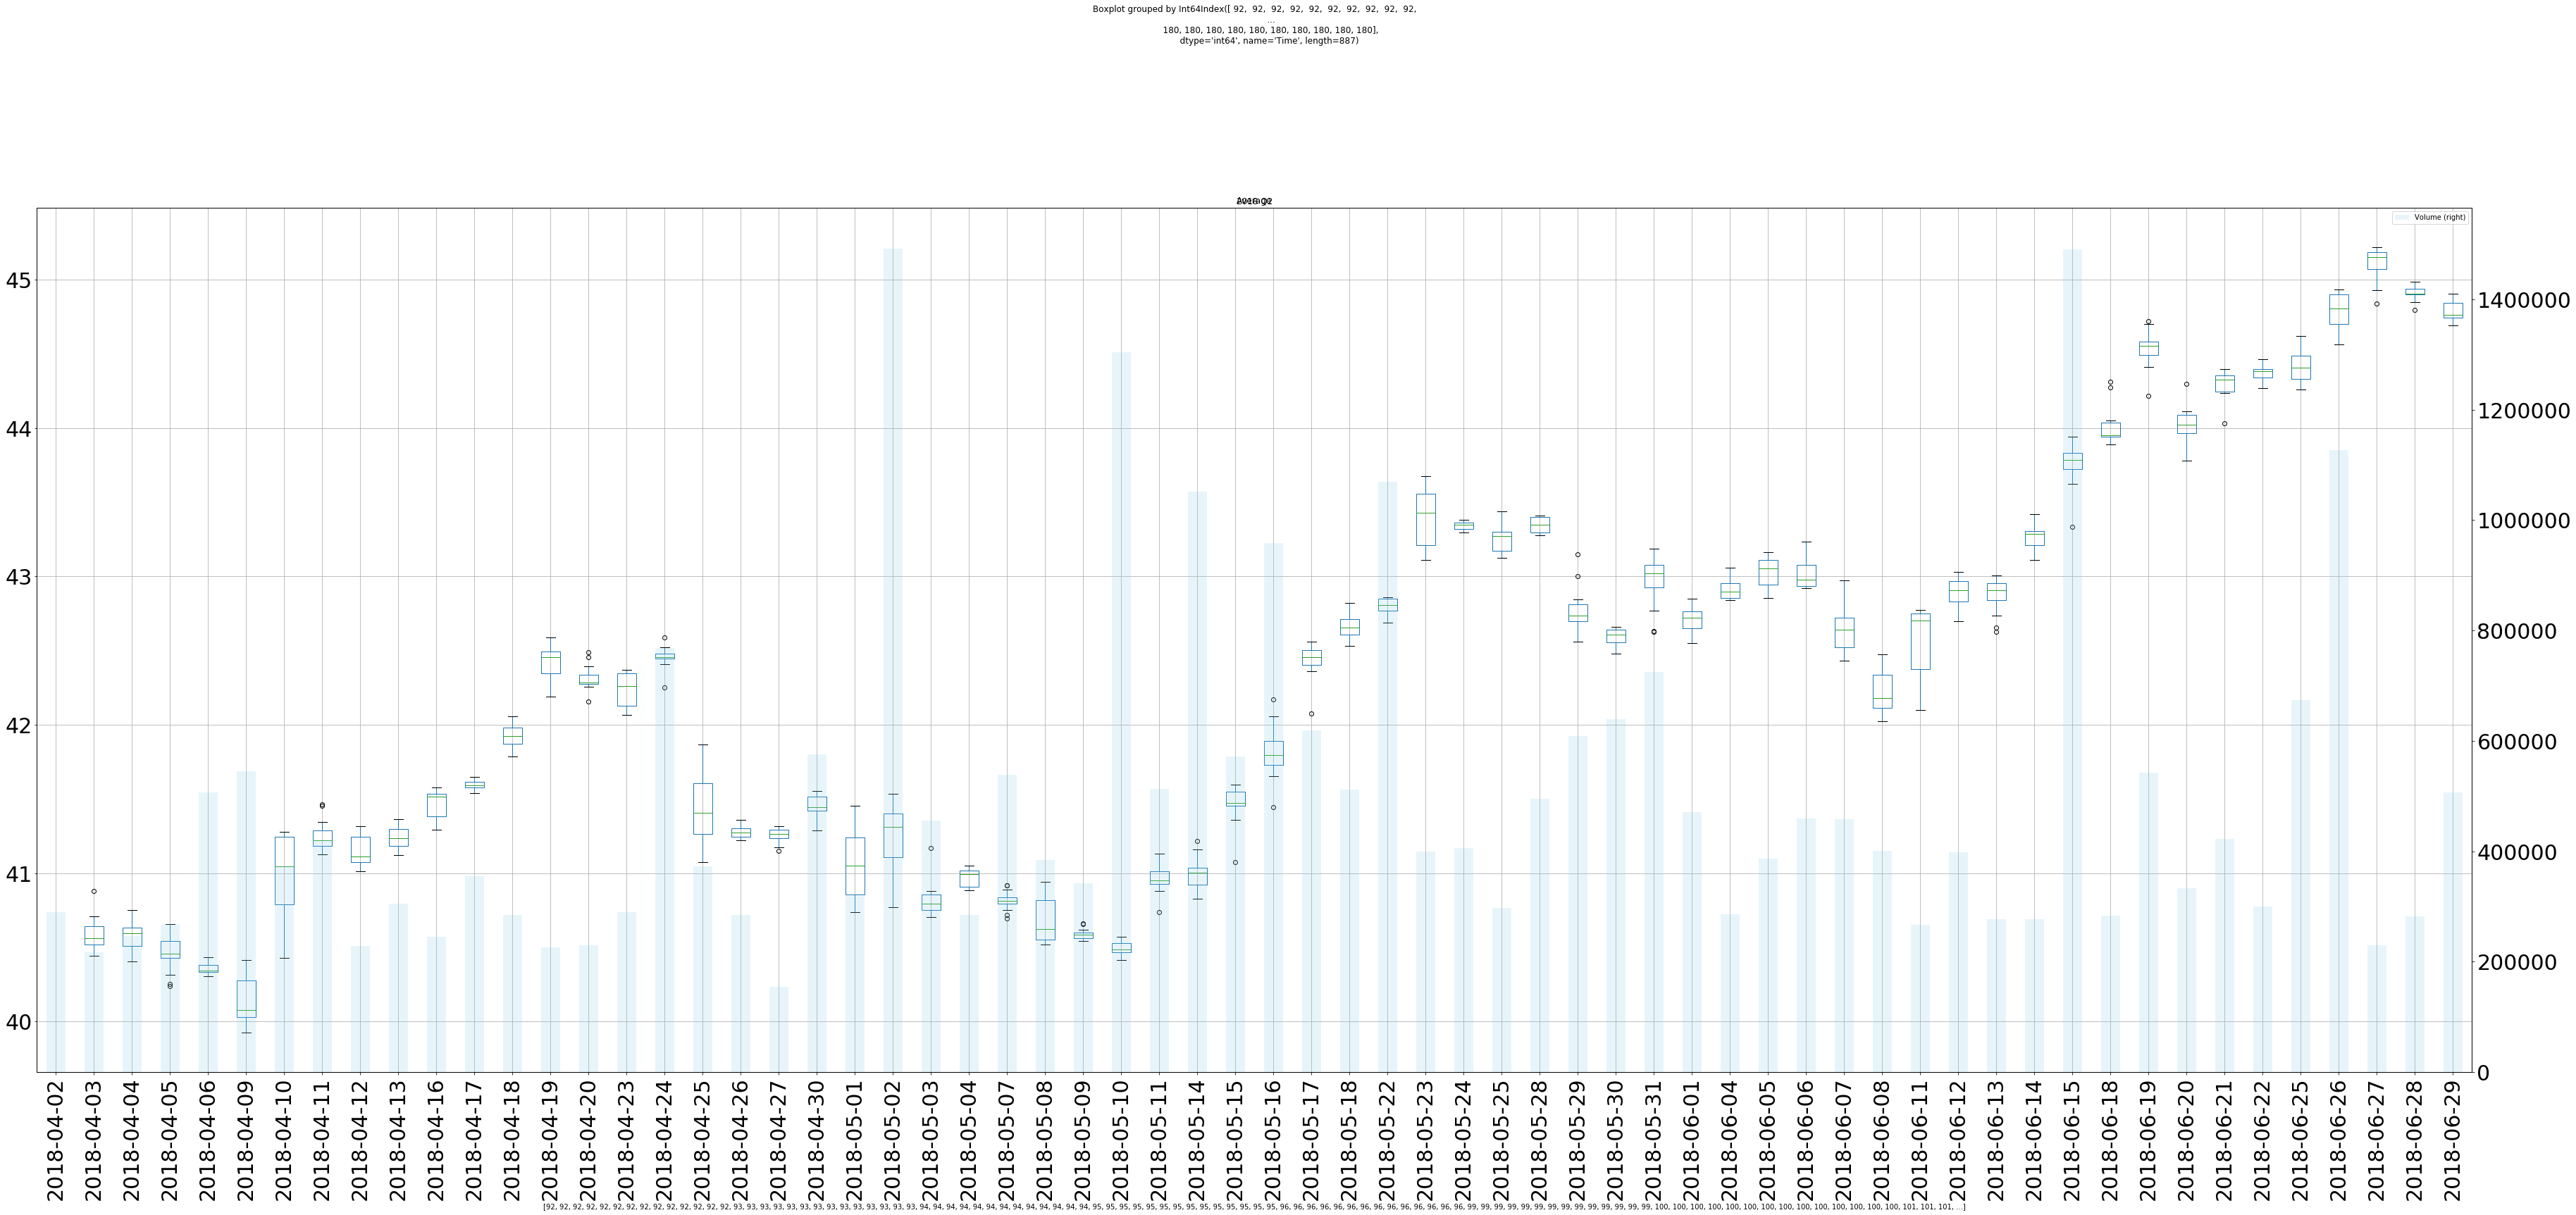

In [139]:
plt.rcParams.update({'axes.titlesize': 'large'})

#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()

ax1= fig.add_subplot(211)
#ax1.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

plt.title('2018 Q2', fontsize= 100)
plt.grid(b= True, axis= 'both')

#plt.suptitle('Volume')

_= metro2018_Q2.boxplot(column='Average', 
                     by= metro2018_Q2.index.dayofyear, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax1
                     )

ax2 = ax1.twinx()
plt.title('2018 Q2')

_= metro2018_Q2_vol.groupby('doy').sum().plot.bar(y= 'Volume',
                                               color= 'skyblue', 
                                               figsize= [60, 50],
                                               rot= 90,
                                               fontsize= 30,
                                               ax= ax2,
                                               secondary_y= True,
                                               alpha= 0.2
                                              )

metro2018_Q2_vol_date = metro2018_Q2_vol.resample('D').sum()
metro2018_Q2_vol_date = metro2018_Q2_vol_date.loc[metro2018_Q2_vol_date['Volume'] != 0]
xlabel = list(metro2018_Q2_vol_date.index.date.astype('str'))
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[xlabel.pop(0) for d in locs]
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')

plt.savefig('metro_2018_Q2.pdf')
plt.show()

### Rolling average of trade volume

[]

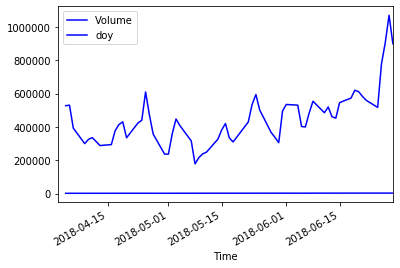

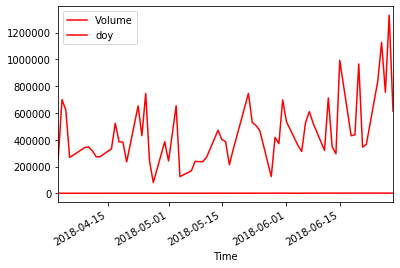

In [368]:
# df group volume by day applying sum
day_sum_vol = sobey2018_Q2_vol.groupby(sobey2018_Q2_vol.index.floor('d')).sum() 
#day_sum_vol2 = sobey2018_Q2_vol.groupby(sobey2018_Q2_vol.index.dayofyear).sum() # Équivalent avec index as day of year 

# Rolling average de la somme des transactions par jour
day_sum_vol.rolling(3).mean().plot(color= 'blue')
# Somme des transactions par jour
day_sum_vol.plot(color= 'red')
plt.plot()

In [50]:
sobey.head()

Time   Open   High    Low   Last  Change  \
Time                                                                      
2017-05-29 10:00:00  05/29/17 10:00  20.81  20.90  20.81  20.89    0.16   
2017-05-29 10:30:00  05/29/17 10:30  20.89  20.89  20.80  20.80   -0.09   
2017-05-29 11:00:00  05/29/17 11:00  20.84  20.94  20.81  20.85    0.05   
2017-05-29 11:30:00  05/29/17 11:30  20.84  20.84  20.80  20.80   -0.05   
2017-05-29 12:00:00  05/29/17 12:00  20.79  20.79  20.74  20.75   -0.05   

                     Volume  Average Week Quarter  
Time                                               
2017-05-29 10:00:00    2100   20.855  W22      Q2  
2017-05-29 10:30:00    2000   20.845  W22      Q2  
2017-05-29 11:00:00    7300   20.875  W22      Q2  
2017-05-29 11:30:00    2200   20.820  W22      Q2  
2017-05-29 12:00:00    6300   20.765  W22      Q2

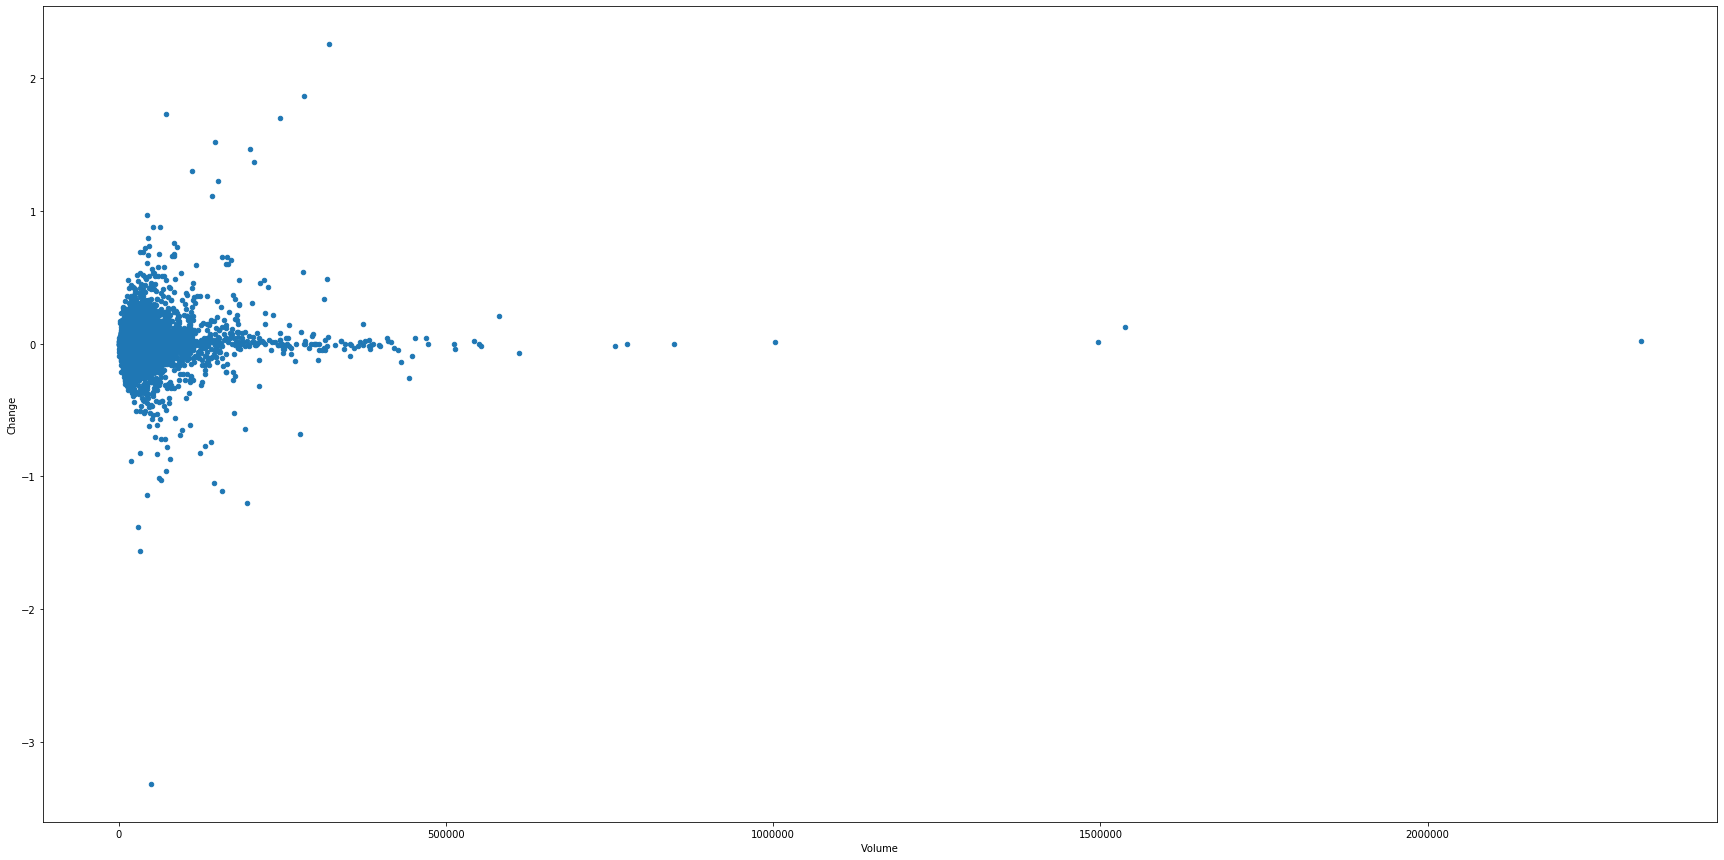

In [39]:
sobey.plot.scatter(x='Volume', y= 'Change', figsize= [30, 15])

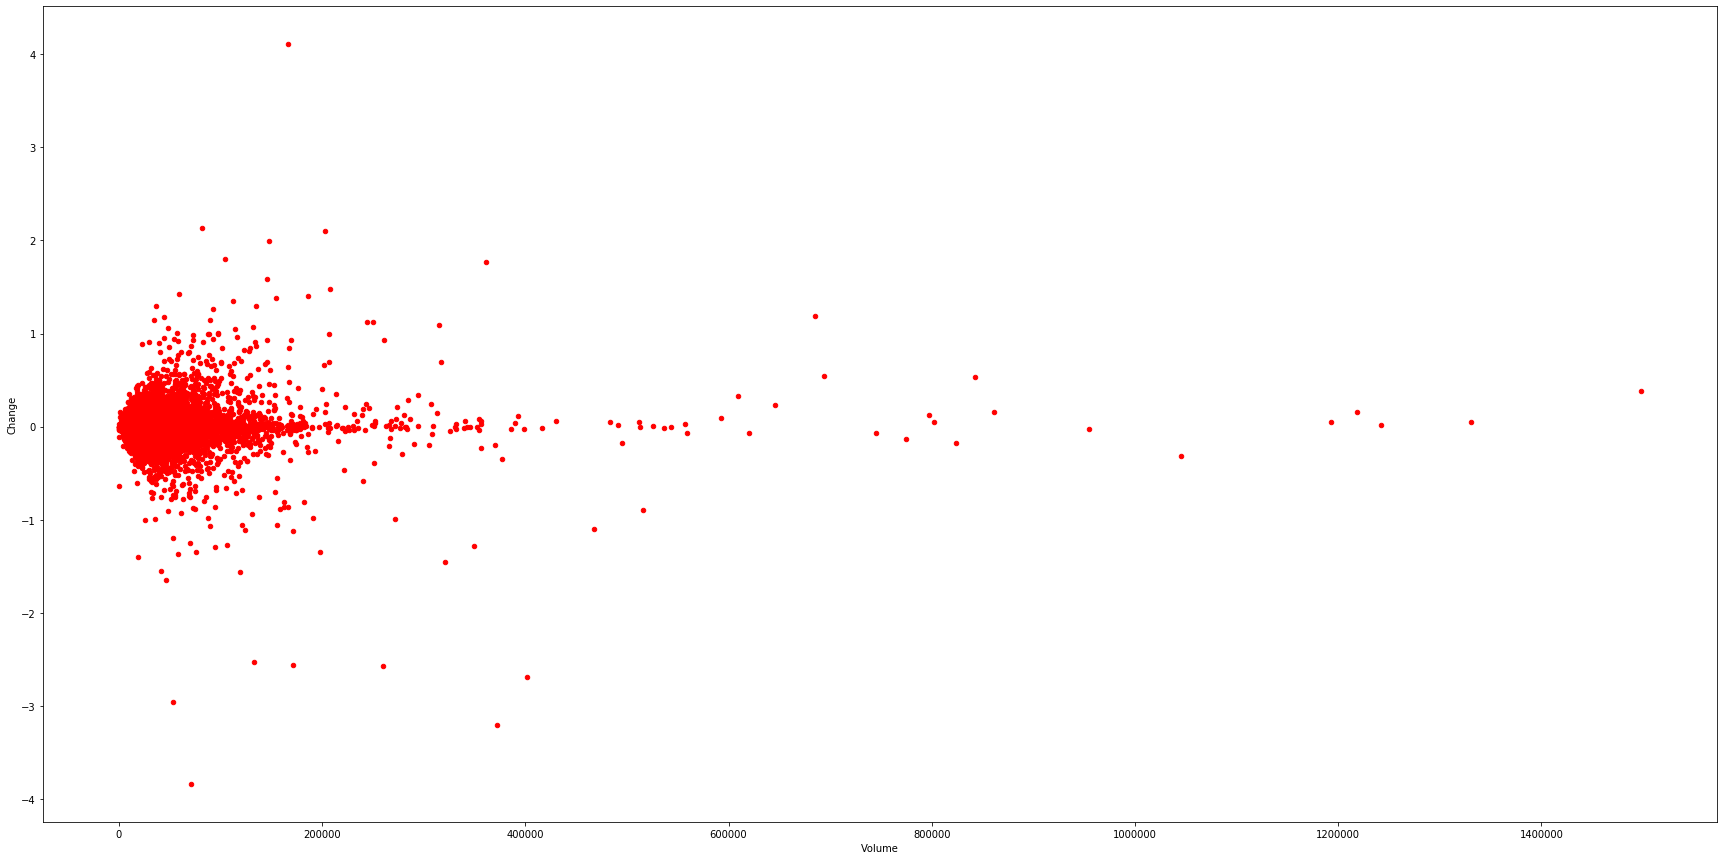

In [41]:
loblaw.plot.scatter(x='Volume', y= 'Change', figsize= [30, 15], color='red')

In [45]:
loblaw.describe()

Open         High          Low         Last       Change  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean     60.982621    61.089075    60.879473    60.986930     0.001472   
std       7.386370     7.407340     7.369736     7.389247     0.205030   
min      50.325410    50.341470    50.220990    50.341470    -3.840000   
25%      54.269500    54.349840    54.193195    54.273770    -0.064270   
50%      59.089180    59.330000    58.976720    59.073120     0.000000   
75%      67.780000    67.915000    67.640000    67.790000     0.070000   
max      76.190000    76.420000    75.930000    76.200000     4.110000   

             Volume  
count  9.999000e+03  
mean   4.324352e+04  
std    5.809934e+04  
min    1.000000e+02  
25%    1.835000e+04  
50%    2.998800e+04  
75%    5.029650e+04  
max    1.497971e+06

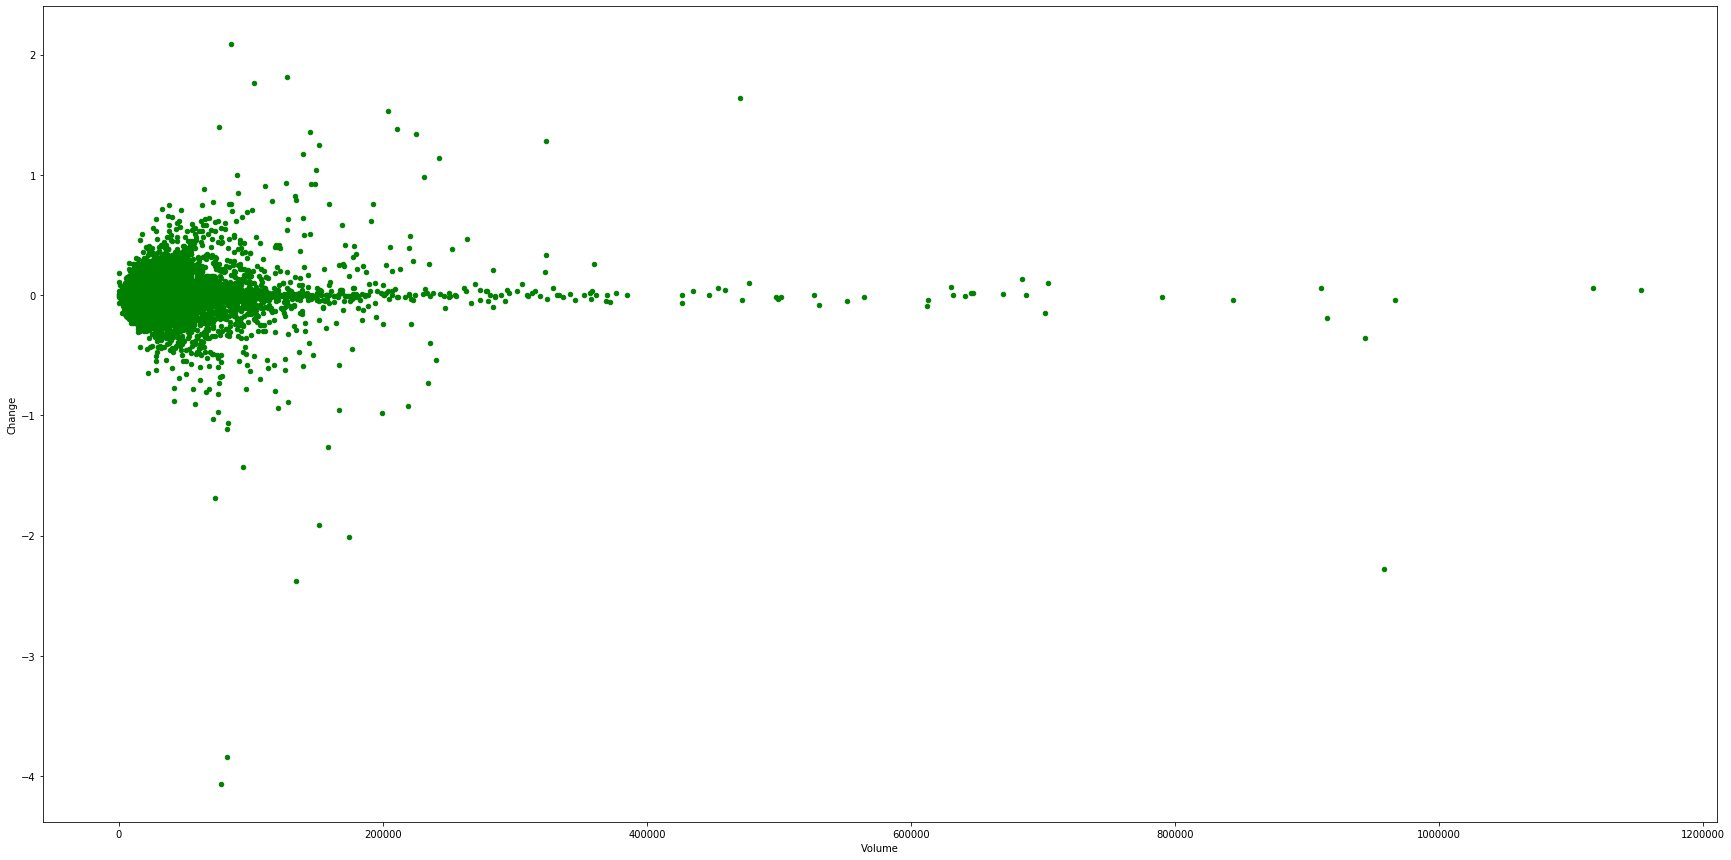

In [43]:
metro.plot.scatter(x='Volume', y= 'Change', figsize= [30, 15], color='green')

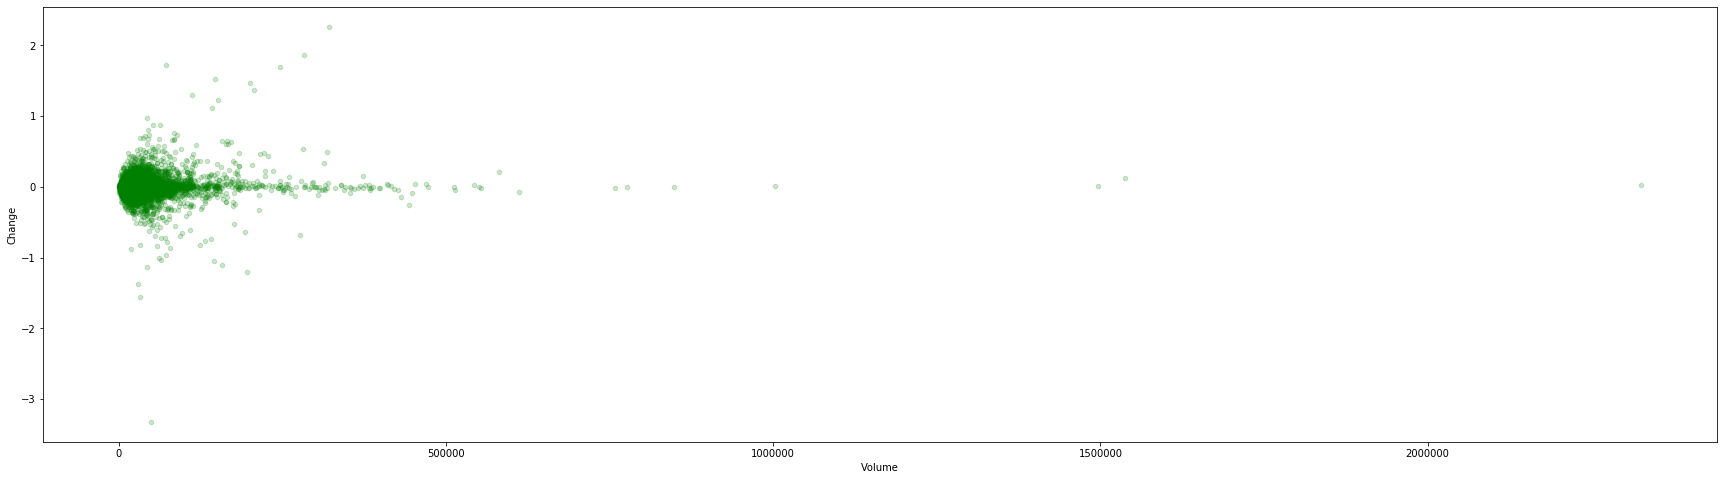

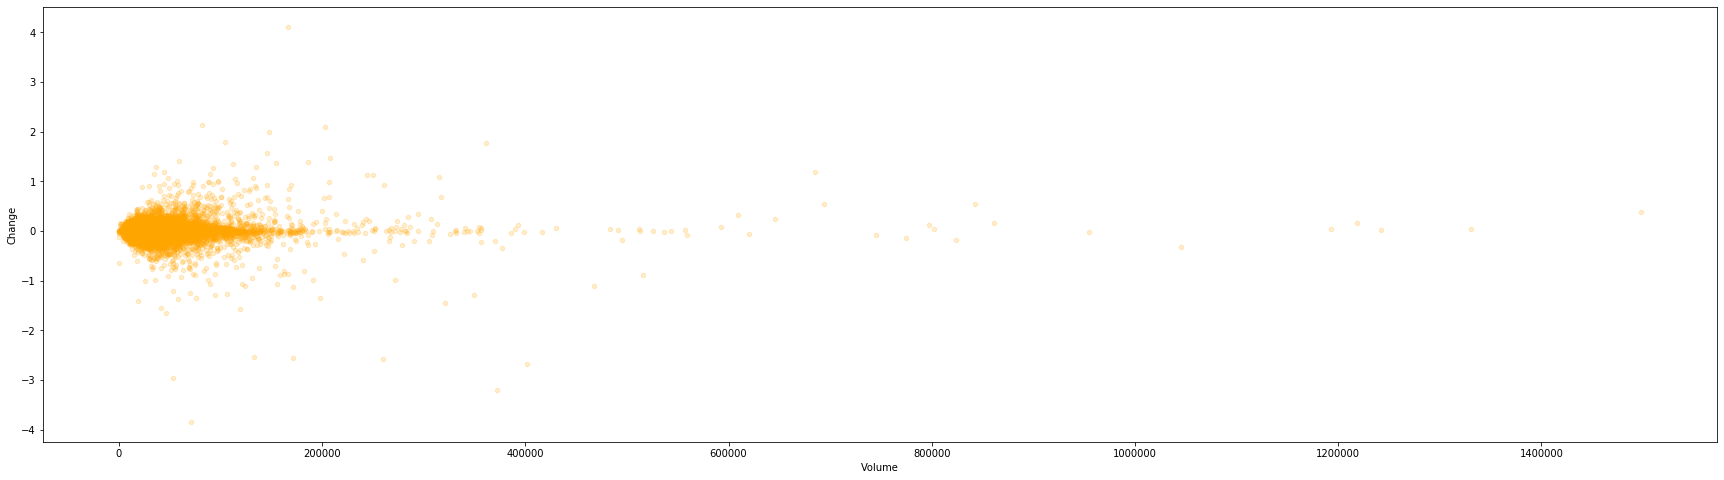

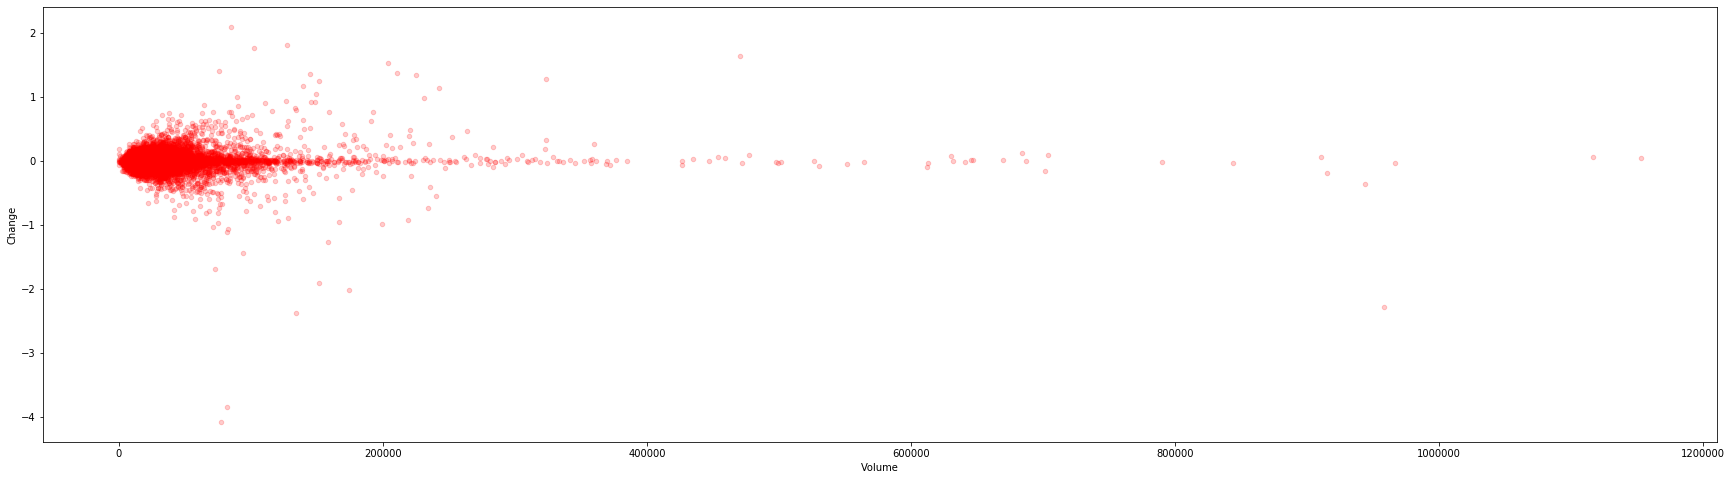

In [49]:
sobey.plot.scatter(x='Volume', y= 'Change', figsize= [30, 8], color='green', alpha= 0.2)
loblaw.plot.scatter(x='Volume', y= 'Change', figsize= [30, 8], color='orange', alpha= 0.2)
metro.plot.scatter(x='Volume', y= 'Change', figsize= [30, 8], color='red', alpha= 0.2)
plt.show()

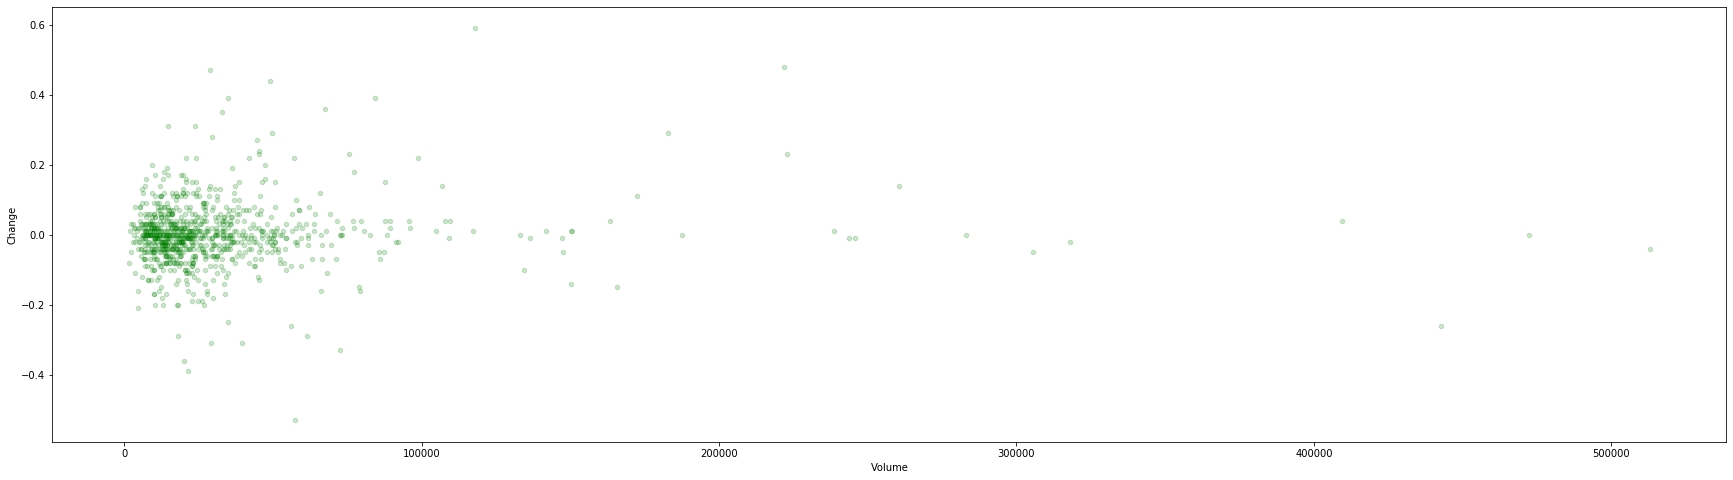

In [65]:
sobey2018[sobey2018['Quarter'] == 'Q2'].plot.scatter(x='Volume', y= 'Change', figsize= [30, 8], color='green', alpha= 0.2)

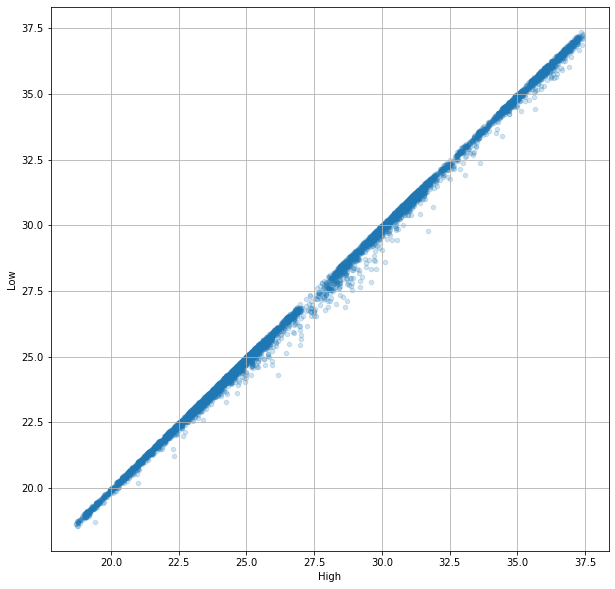

In [66]:

sobey.plot.scatter(x='High', y= 'Low', figsize= [10, 10], grid= True, alpha= 0.2)

## Sobey 2018 Q2
### Normalized difference in %

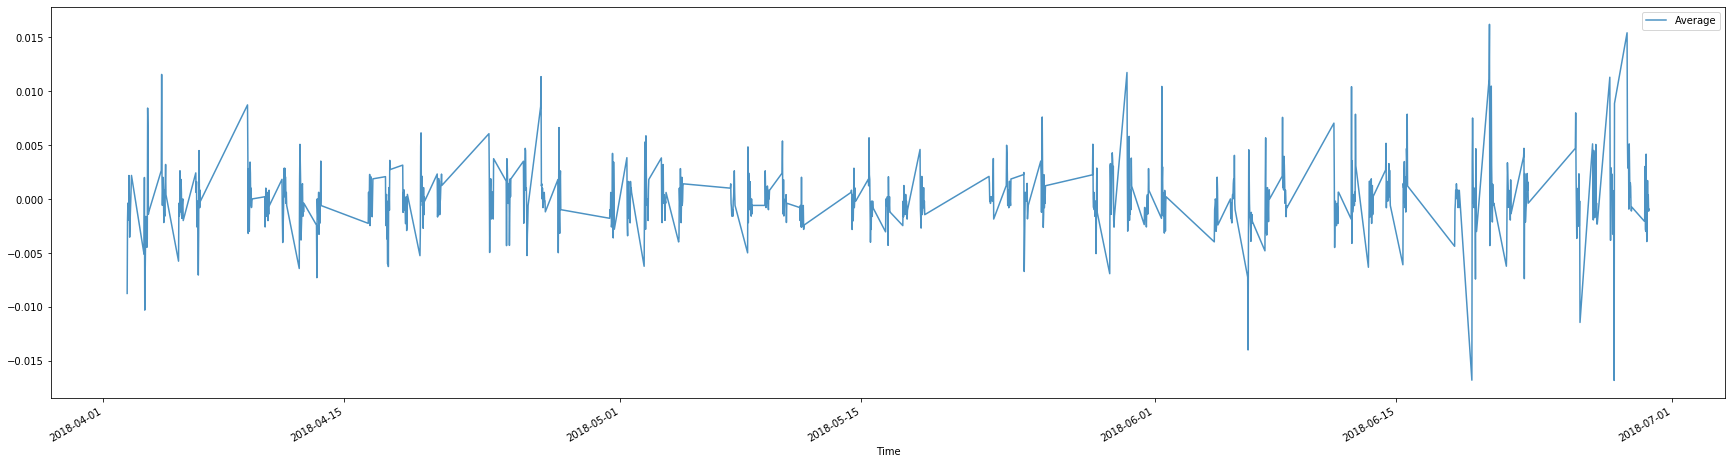

In [80]:
_ = sobey2018_Q2.pct_change().plot(figsize= [30, 8], alpha=.8)

### 30min difference

In [6]:
sobey2018_Q2_diff = sobey2018_Q2['Average'].diff()
sobey2018_Q2_diff.dropna(inplace= True)

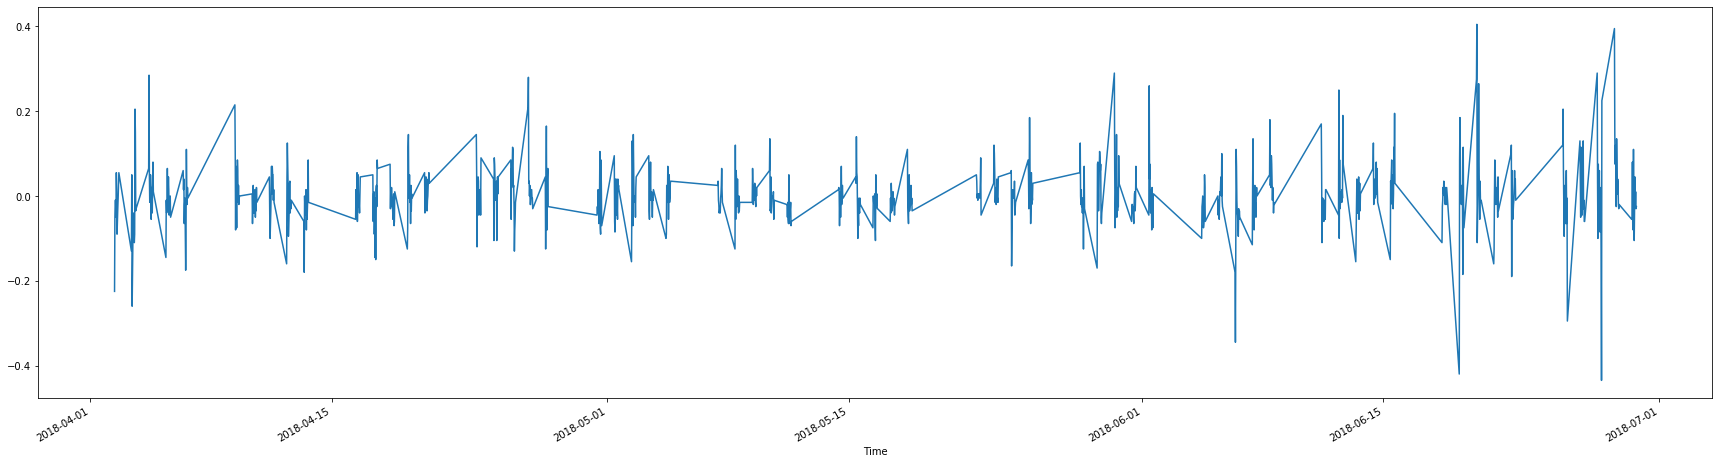

In [47]:
_ = sobey2018_Q2_diff.plot(figsize= [30, 8])

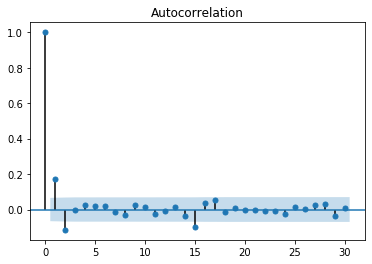

In [16]:
_ = plot_acf(sobey2018_Q2_diff) # _ = est un truc pour éviter d'imprimer 2x le même plot

In [28]:
sobey2018_Q2_pct = sobey2018_Q2['Average'].pct_change()
sobey2018_Q2_pct.dropna(inplace= True)

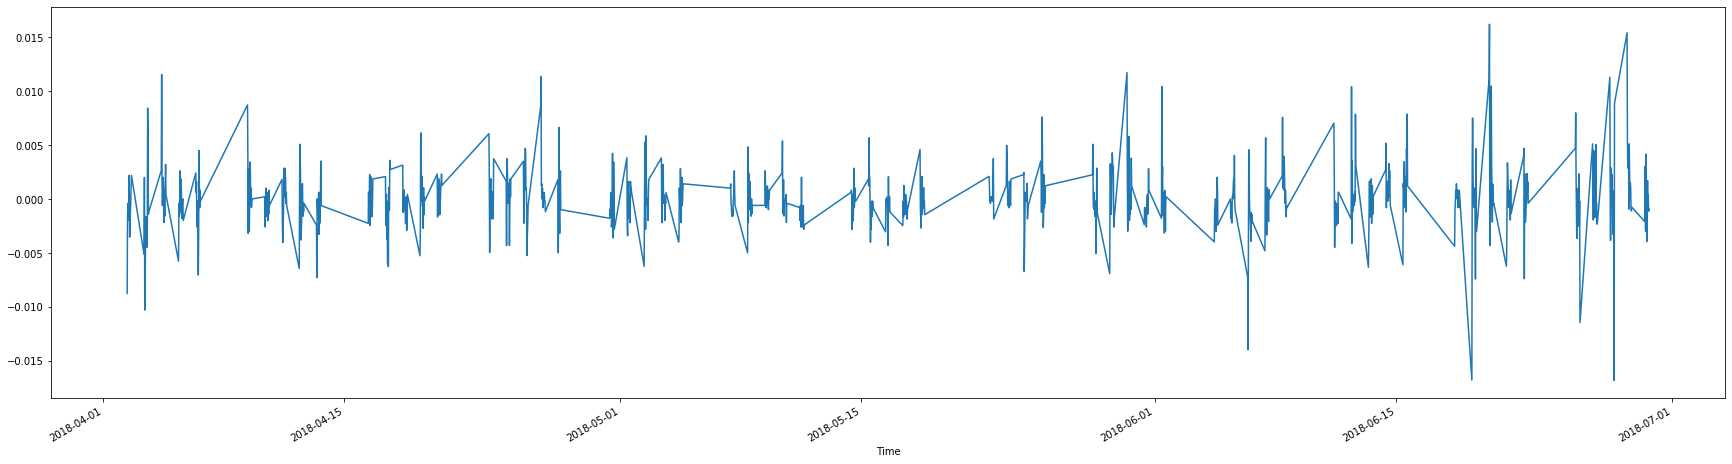

In [46]:
_ = sobey2018_Q2_pct.plot(figsize= [30, 8])

### 1h difference

In [8]:
sobey2018_Q2_diff2 = sobey2018_Q2['Average'].diff(2)
sobey2018_Q2_diff2.dropna(inplace= True)

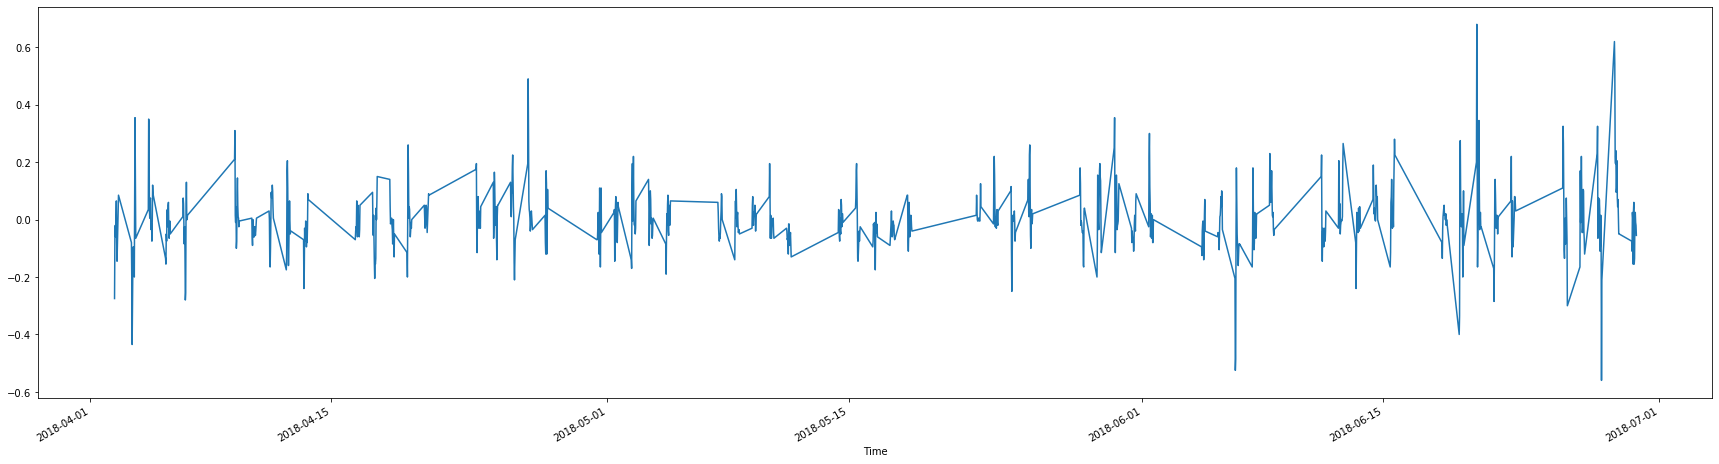

In [45]:
_ = sobey2018_Q2_diff2.plot(figsize= [30, 8])

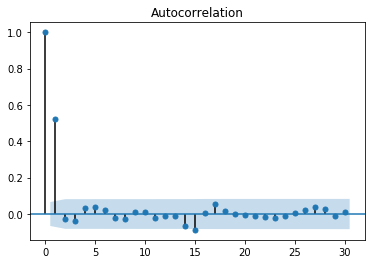

In [15]:
_ = plot_acf(sobey2018_Q2_diff2)  # _ = est un truc pour éviter d'imprimer 2x le même plot

### 1h 30min difference

In [10]:
sobey2018_Q2_diff3 = sobey2018_Q2['Average'].diff(3)
sobey2018_Q2_diff3.dropna(inplace= True)

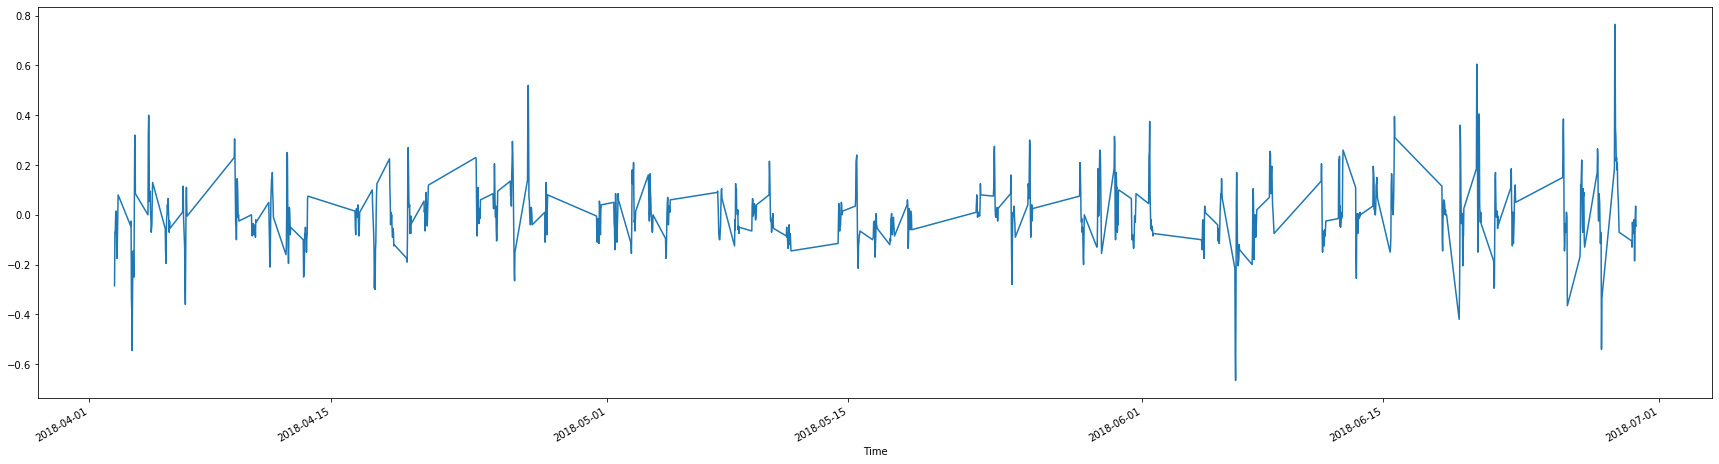

In [44]:
_ = sobey2018_Q2_diff3.plot(figsize= [30, 8])

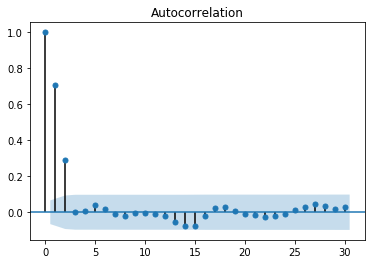

In [13]:
_ = plot_acf(sobey2018_Q2_diff3) # _ = est un truc pour éviter d'imprimer 2x le même plot

### 2h difference

In [17]:
sobey2018_Q2_diff4 = sobey2018_Q2['Average'].diff(4)
sobey2018_Q2_diff4.dropna(inplace= True)

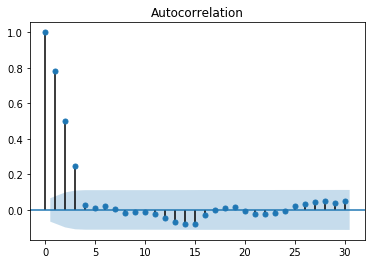

In [27]:
_ = plot_acf(sobey2018_Q2_diff4, alpha= .05) # _ = est un truc pour éviter d'imprimer 2x le même plot

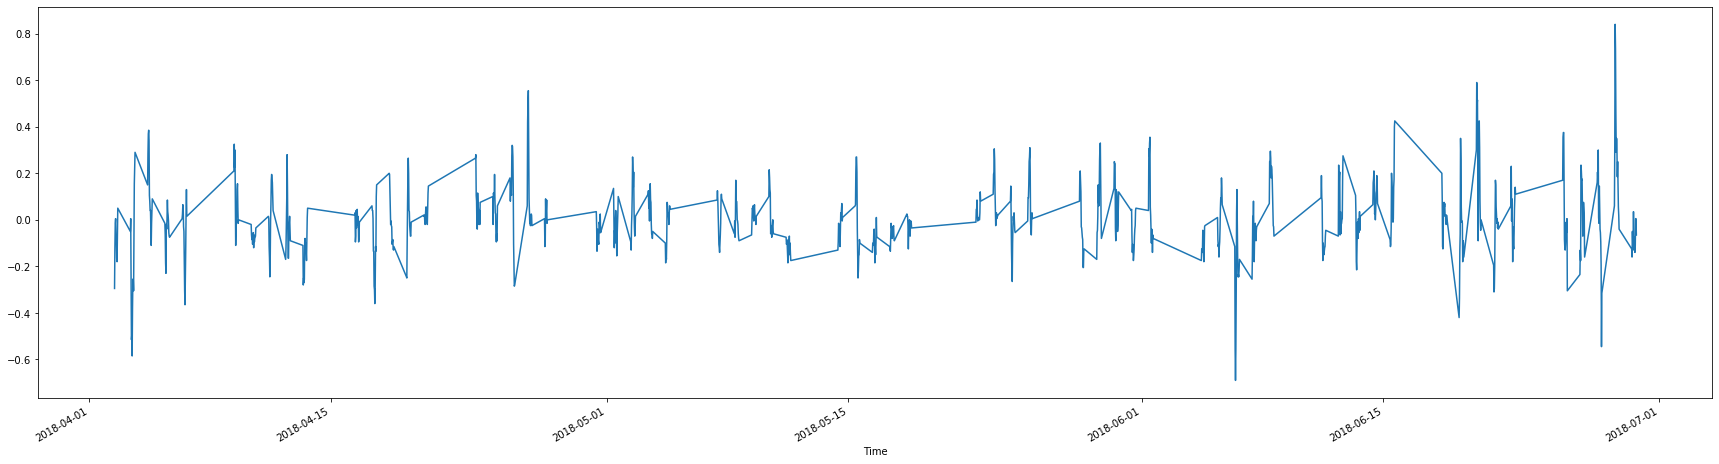

In [43]:
_ = sobey2018_Q2_diff4.plot(figsize= [30, 8])

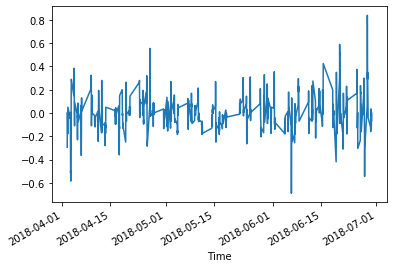

In [79]:
_ = sobey2018_Q2_diff4.plot()

## Sobey week #15
### Normalized difference in %

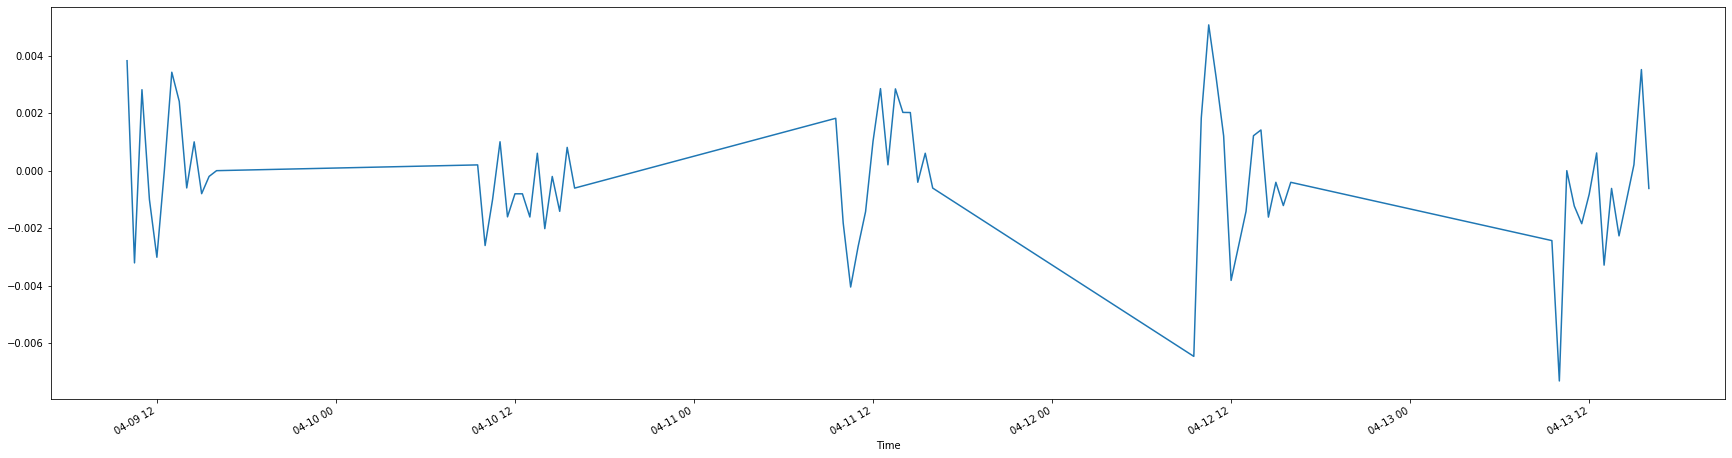

In [59]:
sobey2018_sem15 = sobey2018.loc['2018-04-09':'2018-04-13']
_ = sobey2018_sem15['Average'].pct_change().plot(figsize= [30, 8])

### Dayly Patterns

In [32]:
sobey20180409 = sobey2018.loc['2018-04-09']
sobey20180410 = sobey2018.loc['2018-04-10']
sobey20180411 = sobey2018.loc['2018-04-11']

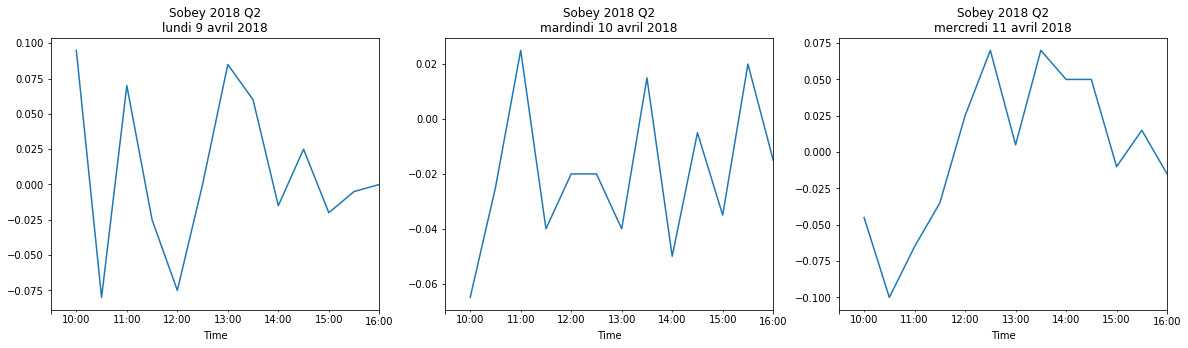

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3)

_ = sobey20180409['Average'].diff().plot(ax=axes[0], figsize= [20,5])
_ = axes[0].set_title('Sobey 2018 Q2\nlundi 9 avril 2018')
_ = sobey20180410['Average'].diff().plot(ax=axes[1], figsize= [20,5])
_ = axes[1].set_title('Sobey 2018 Q2\nmardindi 10 avril 2018')
_ = sobey20180411['Average'].diff().plot(ax=axes[2], figsize= [20,5])
_ = axes[2].set_title('Sobey 2018 Q2\nmercredi 11 avril 2018')

## Archives

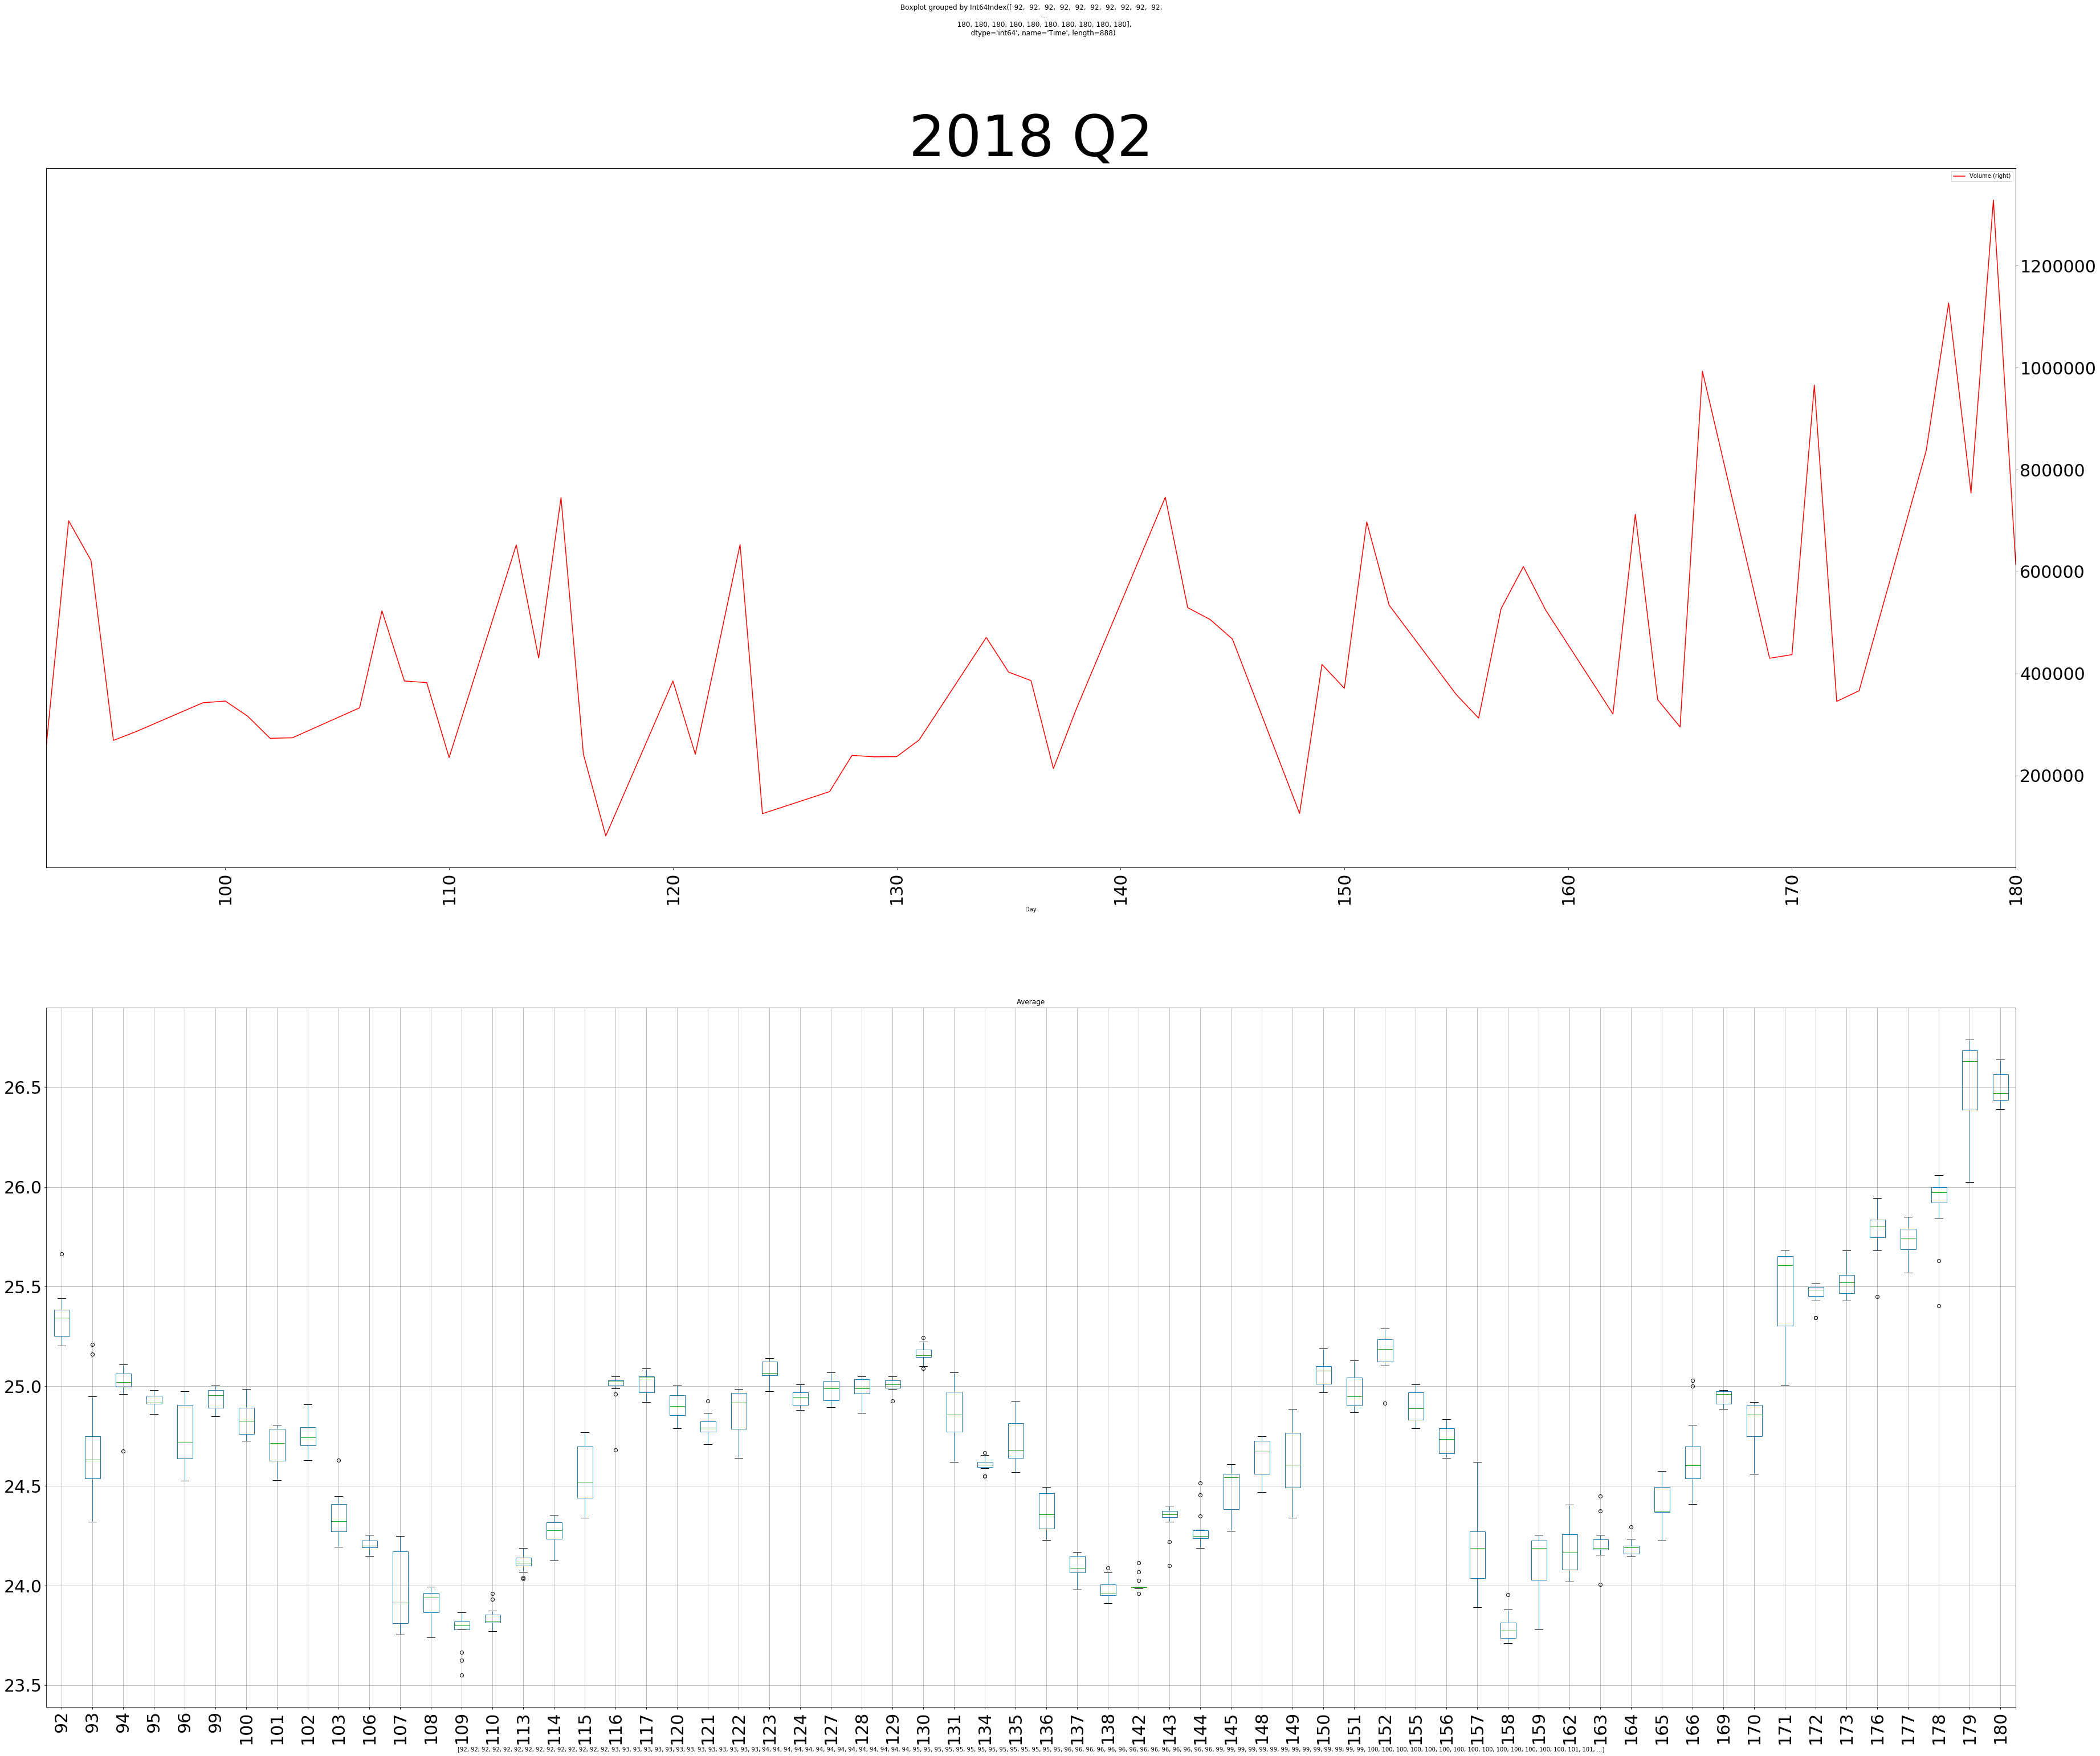

In [336]:
"""
ARCHIVE
"""


#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()
#ax.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

ax1= fig.add_subplot(211)
ax1.set_xlim(90, 182)
plt.title('2018 Q2', fontsize= 100)
plt.suptitle('Volume')

plt.grid(b= True, axis= 'both')

day_sum_vol.plot(color= 'red', 
                 figsize= [60, 50], 
                 secondary_y= True,
                 rot= 90,
                 fontsize= 30,
                 ax= ax1)


ax2 = fig.add_subplot(212)
#ax2 = ax1.twinx()
plt.title('2018 Q2')

sobey2018_Q2.boxplot(column='Average', 
                     by= sobey2018_Q2.index.dayofyear, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax2
                     )
#plt.tight_layout()
plt.show()

In [102]:
from itertools import product

fig, ax = plt.subplots(6, figsize=(20, 10))
m = product(list(sobey.columns), np.arange(1, 5, 1))
for c, i in m:
    ax[i].plot(kind= 'bar', c)
    plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-102-a245cc06dca6>, line 6)

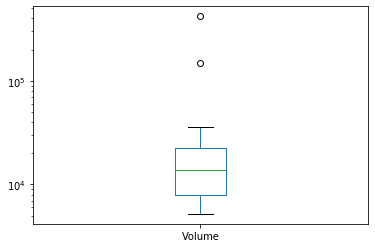

In [143]:
sobey.loc['2017-05-31', ['Volume']].plot(kind= 'box')
plt.yscale('log')
plt.show()

In [151]:
sobey.index.week[25]

14

In [177]:
sobey_2018['2018-12'].head(30)

Time       Open       High        Low  \
Time                                                                   
2018-12-31 16:00:00  12/31/18 16:00  28.830000  28.830000  28.830000   
2018-12-31 15:30:00  12/31/18 15:30  28.790001  28.879999  28.719999   
2018-12-31 15:00:00  12/31/18 15:00  28.740000  28.830000  28.730000   
2018-12-31 14:30:00  12/31/18 14:30  28.719999  28.830000  28.700001   
2018-12-31 14:00:00  12/31/18 14:00  28.600000  28.740000  28.600000   
2018-12-31 13:30:00  12/31/18 13:30  28.670000  28.680000  28.570000   
2018-12-31 13:00:00  12/31/18 13:00  28.660000  28.760000  28.639999   
2018-12-31 12:30:00  12/31/18 12:30  28.520000  28.639999  28.520000   
2018-12-31 12:00:00  12/31/18 12:00  28.480000  28.549999  28.469999   
2018-12-31 11:30:00  12/31/18 11:30  28.379999  28.520000  28.379999   
2018-12-31 11:00:00  12/31/18 11:00  28.410000  28.410000  28.330000   
2018-12-31 10:30:00  12/31/18 10:30  28.430000  28.459999  28.389999   
2018-12-31 10:00:00  12/31/18 10:00  28.520000  28.570000  28.350000   
2018-12-31 09:30:00  12/31/18 09:30  28.320000  28.889999  28.320000   
2018-12-28 16:00:00  12/28/18 16:00  28.190001  28.190001  28.190001   
2018-12-28 15:30:00  12/28/18 15:30  28.290001  28.309999  28.160000   
2018-12-28 15:00:00  12/28/18 15:00  28.410000  28.440001  28.260000   
2018-12-28 14:30:00  12/28/18 14:30  28.440001  28.450001  28.400000   
2018-12-28 14:00:00  12/28/18 14:00  28.510000  28.549999  28.410000   
2018-12-28 13:30:00  12/28/18 13:30  28.480000  28.580000  28.430000   
2018-12-28 13:00:00  12/28/18 13:00  28.309999  28.520000  28.299999   
2018-12-28 12:30:00  12/28/18 12:30  28.299999  28.350000  28.280001   
2018-12-28 12:00:00  12/28/18 12:00  28.170000  28.330000  28.170000   
2018-12-28 11:30:00  12/28/18 11:30  28.190001  28.240000  28.120001   
2018-12-28 11:00:00  12/28/18 11:00  28.340000  28.340000  28.139999   
2018-12-28 10:30:00  12/28/18 10:30  28.459999  28.480000  28.320000   
2018-12-28 10:00:00  12/28/18 10:00  28.490000  28.490000  28.340000   
2018-12-28 09:30:00  12/28/18 09:30  28.540001  28.670000  28.500000   
2018-12-27 16:00:00  12/27/18 16:00  28.520000  28.520000  28.520000   
2018-12-27 15:30:00  12/27/18 15:30  28.420000  28.549999  28.400000   

                          Last  Change  Volume  temp  
Time                                                  
2018-12-31 16:00:00  28.830000    0.03  104400     1  
2018-12-31 15:30:00  28.799999    0.02   91200     1  
2018-12-31 15:00:00  28.780001    0.03   32000     1  
2018-12-31 14:30:00  28.750000    0.03   34000     1  
2018-12-31 14:00:00  28.719999    0.11   14800     1  
2018-12-31 13:30:00  28.610001   -0.07   10500     1  
2018-12-31 13:00:00  28.680000    0.04    4800     1  
2018-12-31 12:30:00  28.639999    0.12    6800     1  
2018-12-31 12:00:00  28.520000    0.03    6800     1  
2018-12-31 11:30:00  28.490000    0.11   11400     1  
2018-12-31 11:00:00  28.379999   -0.04    6300     1  
2018-12-31 10:30:00  28.420000   -0.02    6100     1  
2018-12-31 10:00:00  28.440001   -0.07    7500     1  
2018-12-31 09:30:00  28.510000    0.32   19300     1  
2018-12-28 16:00:00  28.190001    0.02   44600    52  
2018-12-28 15:30:00  28.170000   -0.11   83500    52  
2018-12-28 15:00:00  28.280001   -0.12   16000    52  
2018-12-28 14:30:00  28.400000   -0.03   22600    52  
2018-12-28 14:00:00  28.430000   -0.07   18200    52  
2018-12-28 13:30:00  28.500000    0.02   15600    52  
2018-12-28 13:00:00  28.480000    0.18   20600    52  
2018-12-28 12:30:00  28.299999    0.01   11100    52  
2018-12-28 12:00:00  28.290001    0.10   14200    52  
2018-12-28 11:30:00  28.190001   -0.01   15100    52  
2018-12-28 11:00:00  28.200001   -0.14   16800    52  
2018-12-28 10:30:00  28.340000   -0.10   14300    52  
2018-12-28 10:00:00  28.440001   -0.06   17300    52  
2018-12-28 09:30:00  28.500000   -0.02   11200    52  
2018-12-27 16:00:00  28.520000    0.01   21500    52  
2018-12-27 15:30:00  

In [196]:
sobey_2018['quarter']= sobey_2018.index.quarter
sobey_2018.head()

/Users/jonathanbeaulieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Time       Open       High        Low  \
Time                                                                   
2018-12-31 16:00:00  12/31/18 16:00  28.830000  28.830000  28.830000   
2018-12-31 15:30:00  12/31/18 15:30  28.790001  28.879999  28.719999   
2018-12-31 15:00:00  12/31/18 15:00  28.740000  28.830000  28.730000   
2018-12-31 14:30:00  12/31/18 14:30  28.719999  28.830000  28.700001   
2018-12-31 14:00:00  12/31/18 14:00  28.600000  28.740000  28.600000   

                          Last  Change  Volume  temp  quarter  
Time                                                           
2018-12-31 16:00:00  28.830000    0.03  104400     1        4  
2018-12-31 15:30:00  28.799999    0.02   91200     1        4  
2018-12-31 15:00:00  28.780001    0.03   32000     1        4  
2018-12-31 14:30:00  28.750000    0.03   34000     1        4  
2018-12-31 14:00:00  28.719999    0.11   14800     1        4

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

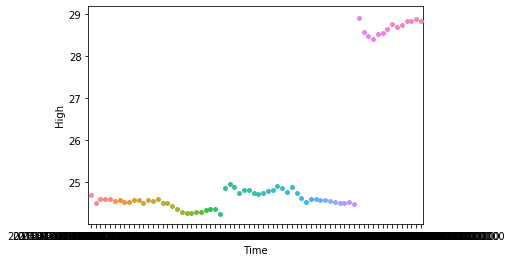

In [201]:
s_high_1 = sobey_2018_1.loc[:,['High']]
sns.swarmplot(s_high_1.index, sobey_2018_1['High'])
plt.plot

In [4]:
# Slice les périodes
sobey2018 = sobey['2018']
sobey2018 = sobey2018.drop(columns= ['Time', 'Open', 'Last', 'High', 'Low' ])
sobey2018_Q2 = sobey2018.loc[sobey2018['Quarter'] == 'Q2', ['Average']]
sobey2018_Q2_vol = sobey2018.loc[sobey2018['Quarter'] == 'Q2', ['Volume']]

In [25]:
sobey2018_Q2_vol = sobey2018_Q2_vol.resample('D').sum()
sobey2018_Q2_vol = sobey2018_Q2_vol.loc[sobey2018_Q2_vol['Volume'] != 0]

IndexError: pop from empty list

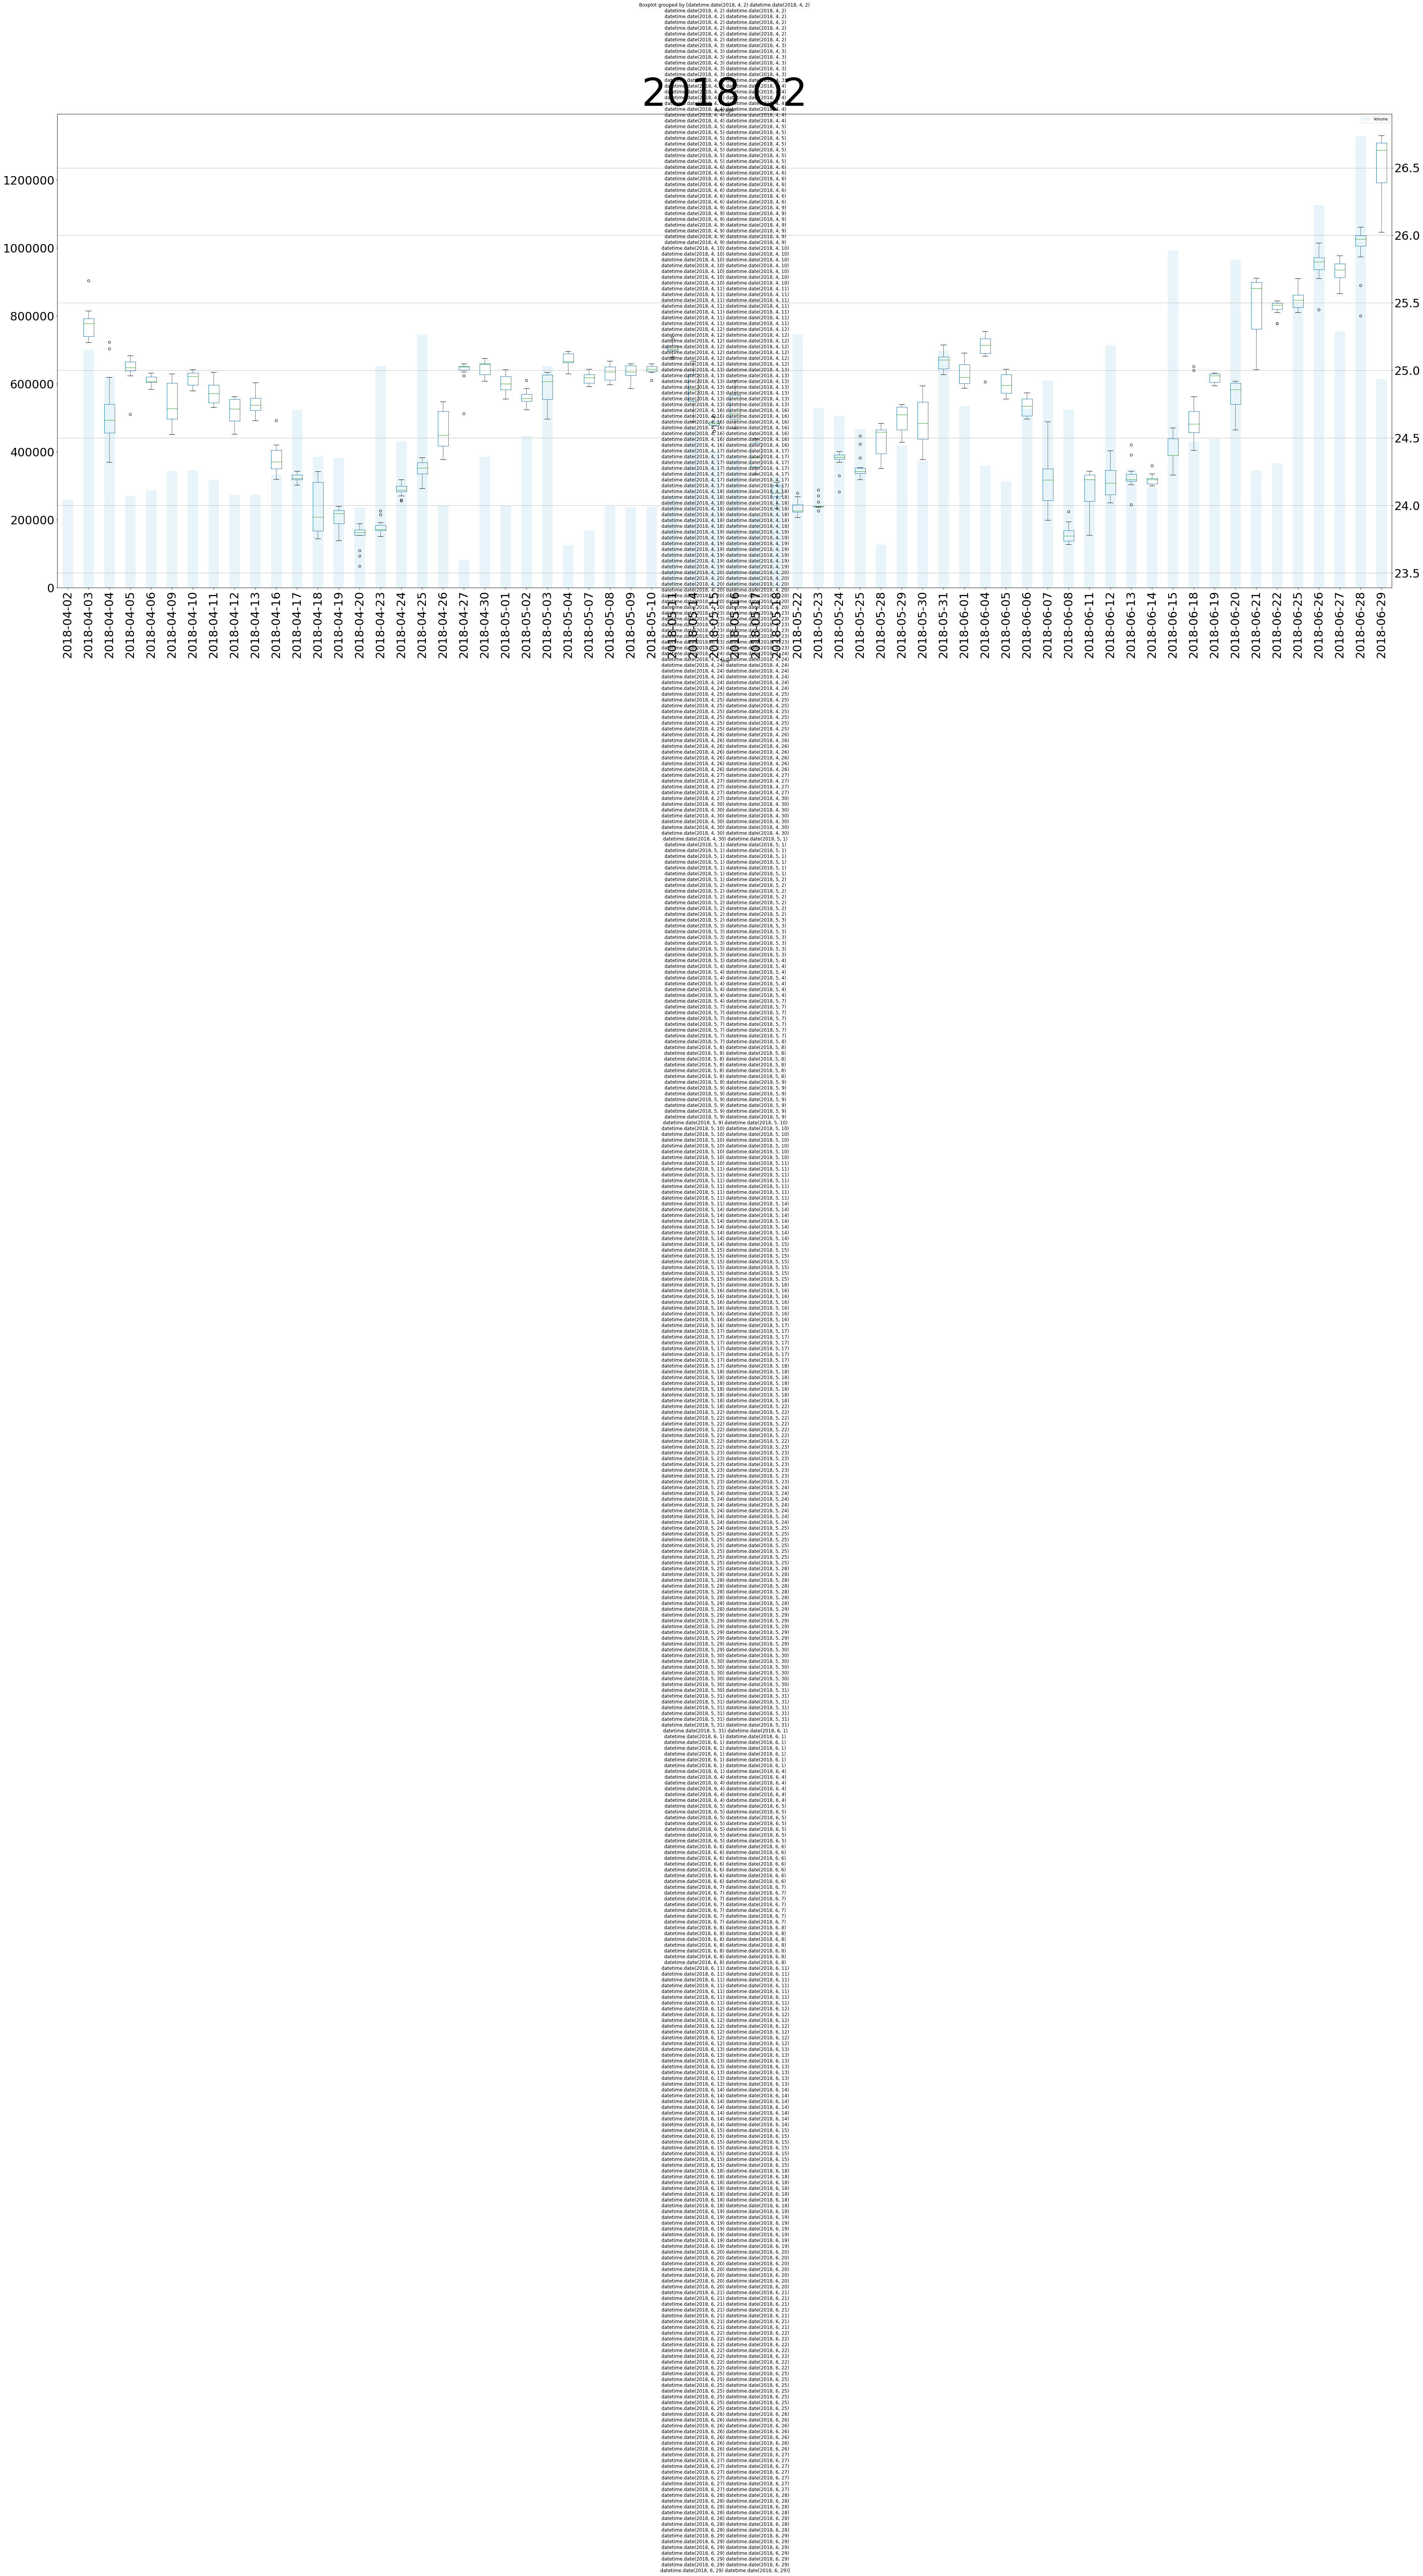

In [107]:
#plt.rcParams.update({'axes.titlesize': 'large'})

xlabel = list(sobey2018_Q2_vol.index.astype('str'))

#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()

ax1= fig.add_subplot(211)
#ax1.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

plt.title('2018 Q2', fontsize= 100)
plt.grid(b= True, axis= 'both')

#plt.suptitle('Volume')

sobey2018_Q2_vol.plot.bar(y= 'Volume',
                          color= 'skyblue', 
                          figsize= [60, 50],
                          fontsize= 30,
                          ax= ax1,
                          mark_right= True,
                          alpha= 0.2
                         )


ax2 = ax1.twinx()
plt.title('2018 Q2')

sobey2018_Q2.boxplot(column='Average', 
                     by= sobey2018_Q2.index.date, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax2
                     )

locs, labels= plt.xticks()
x_ticks = []
new_xticks=[xlabel.pop(0) for d in locs]
plt.xticks(locs, new_xticks, rotation=90, horizontalalignment='right')

#plt.savefig('Sobey_2018_Q2_date.pdf')
plt.show()

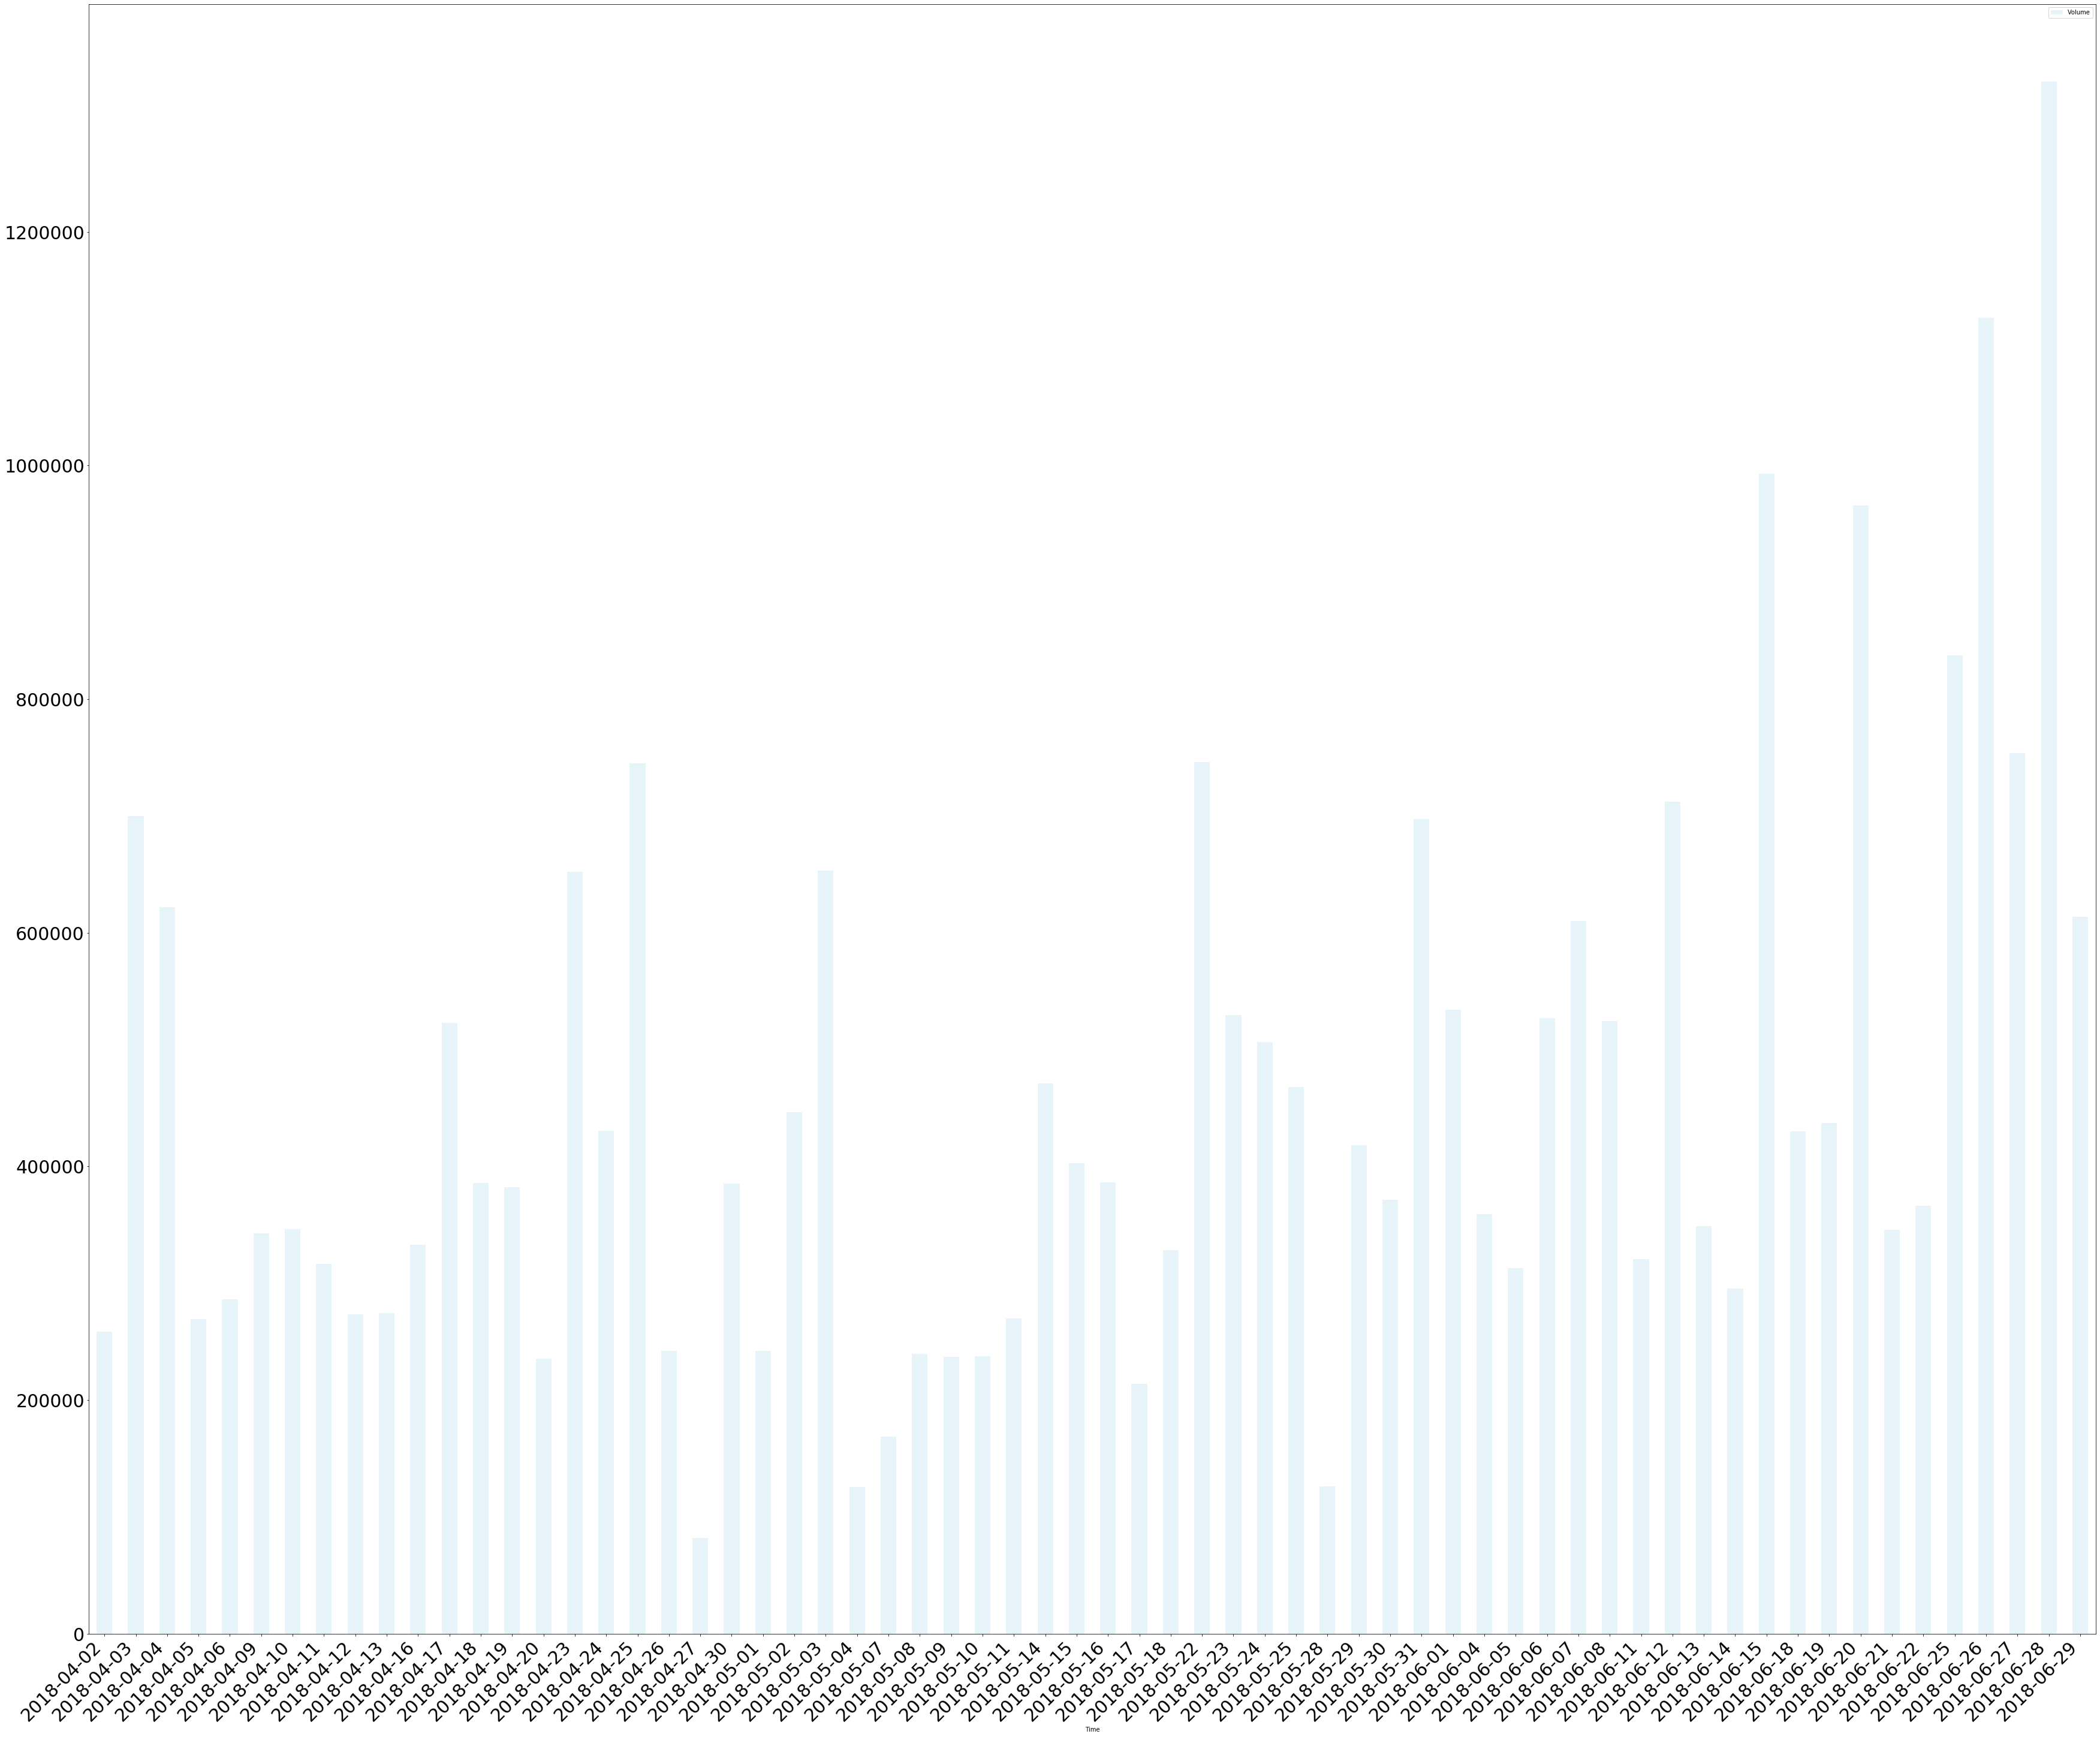

In [82]:
sobey2018_Q2_vol.plot.bar(y= 'Volume',
                          color= 'skyblue', 
                          figsize= [60, 50],
                          rot= 90,
                          fontsize= 30,
                          secondary_y= False,
                          alpha= 0.2
                         )
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[xlabel.pop(0) for d in locs]
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')
#plt.xticks(xlabel)
plt.show()

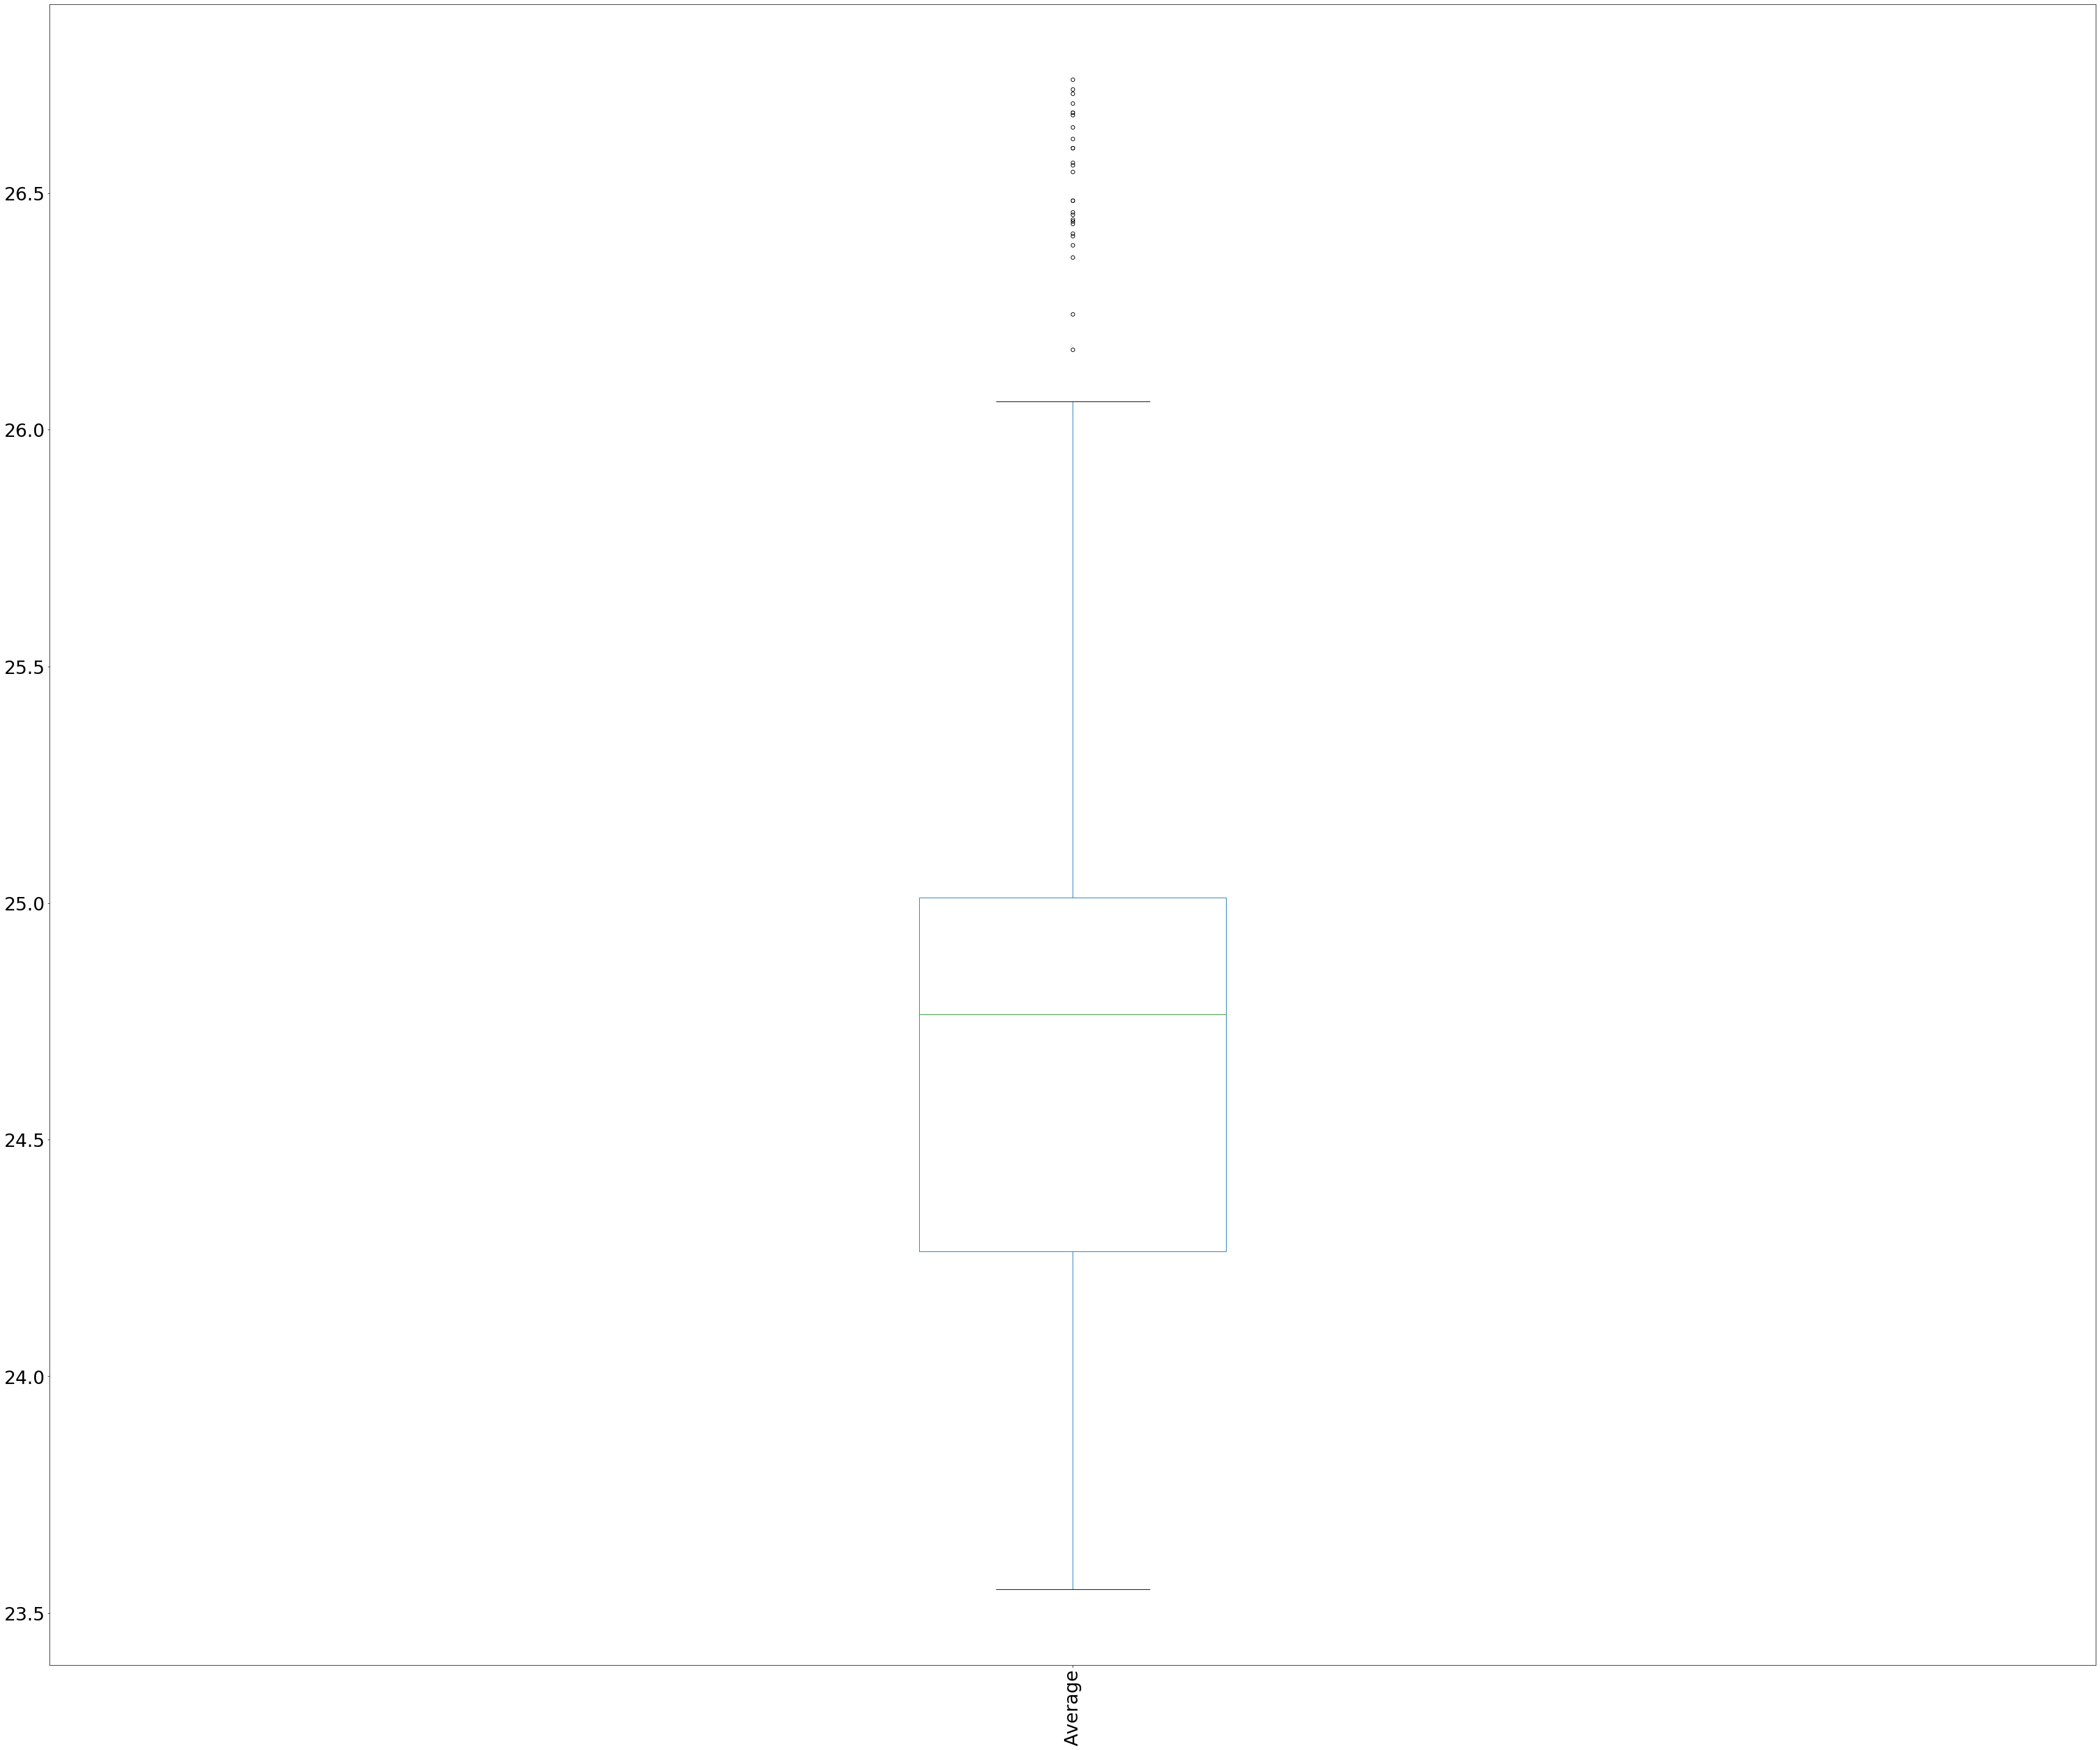

In [110]:
sobey2018_Q2.plot.box( 
                     by= sobey2018_Q2['date'], 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30
                     )
plt.show()

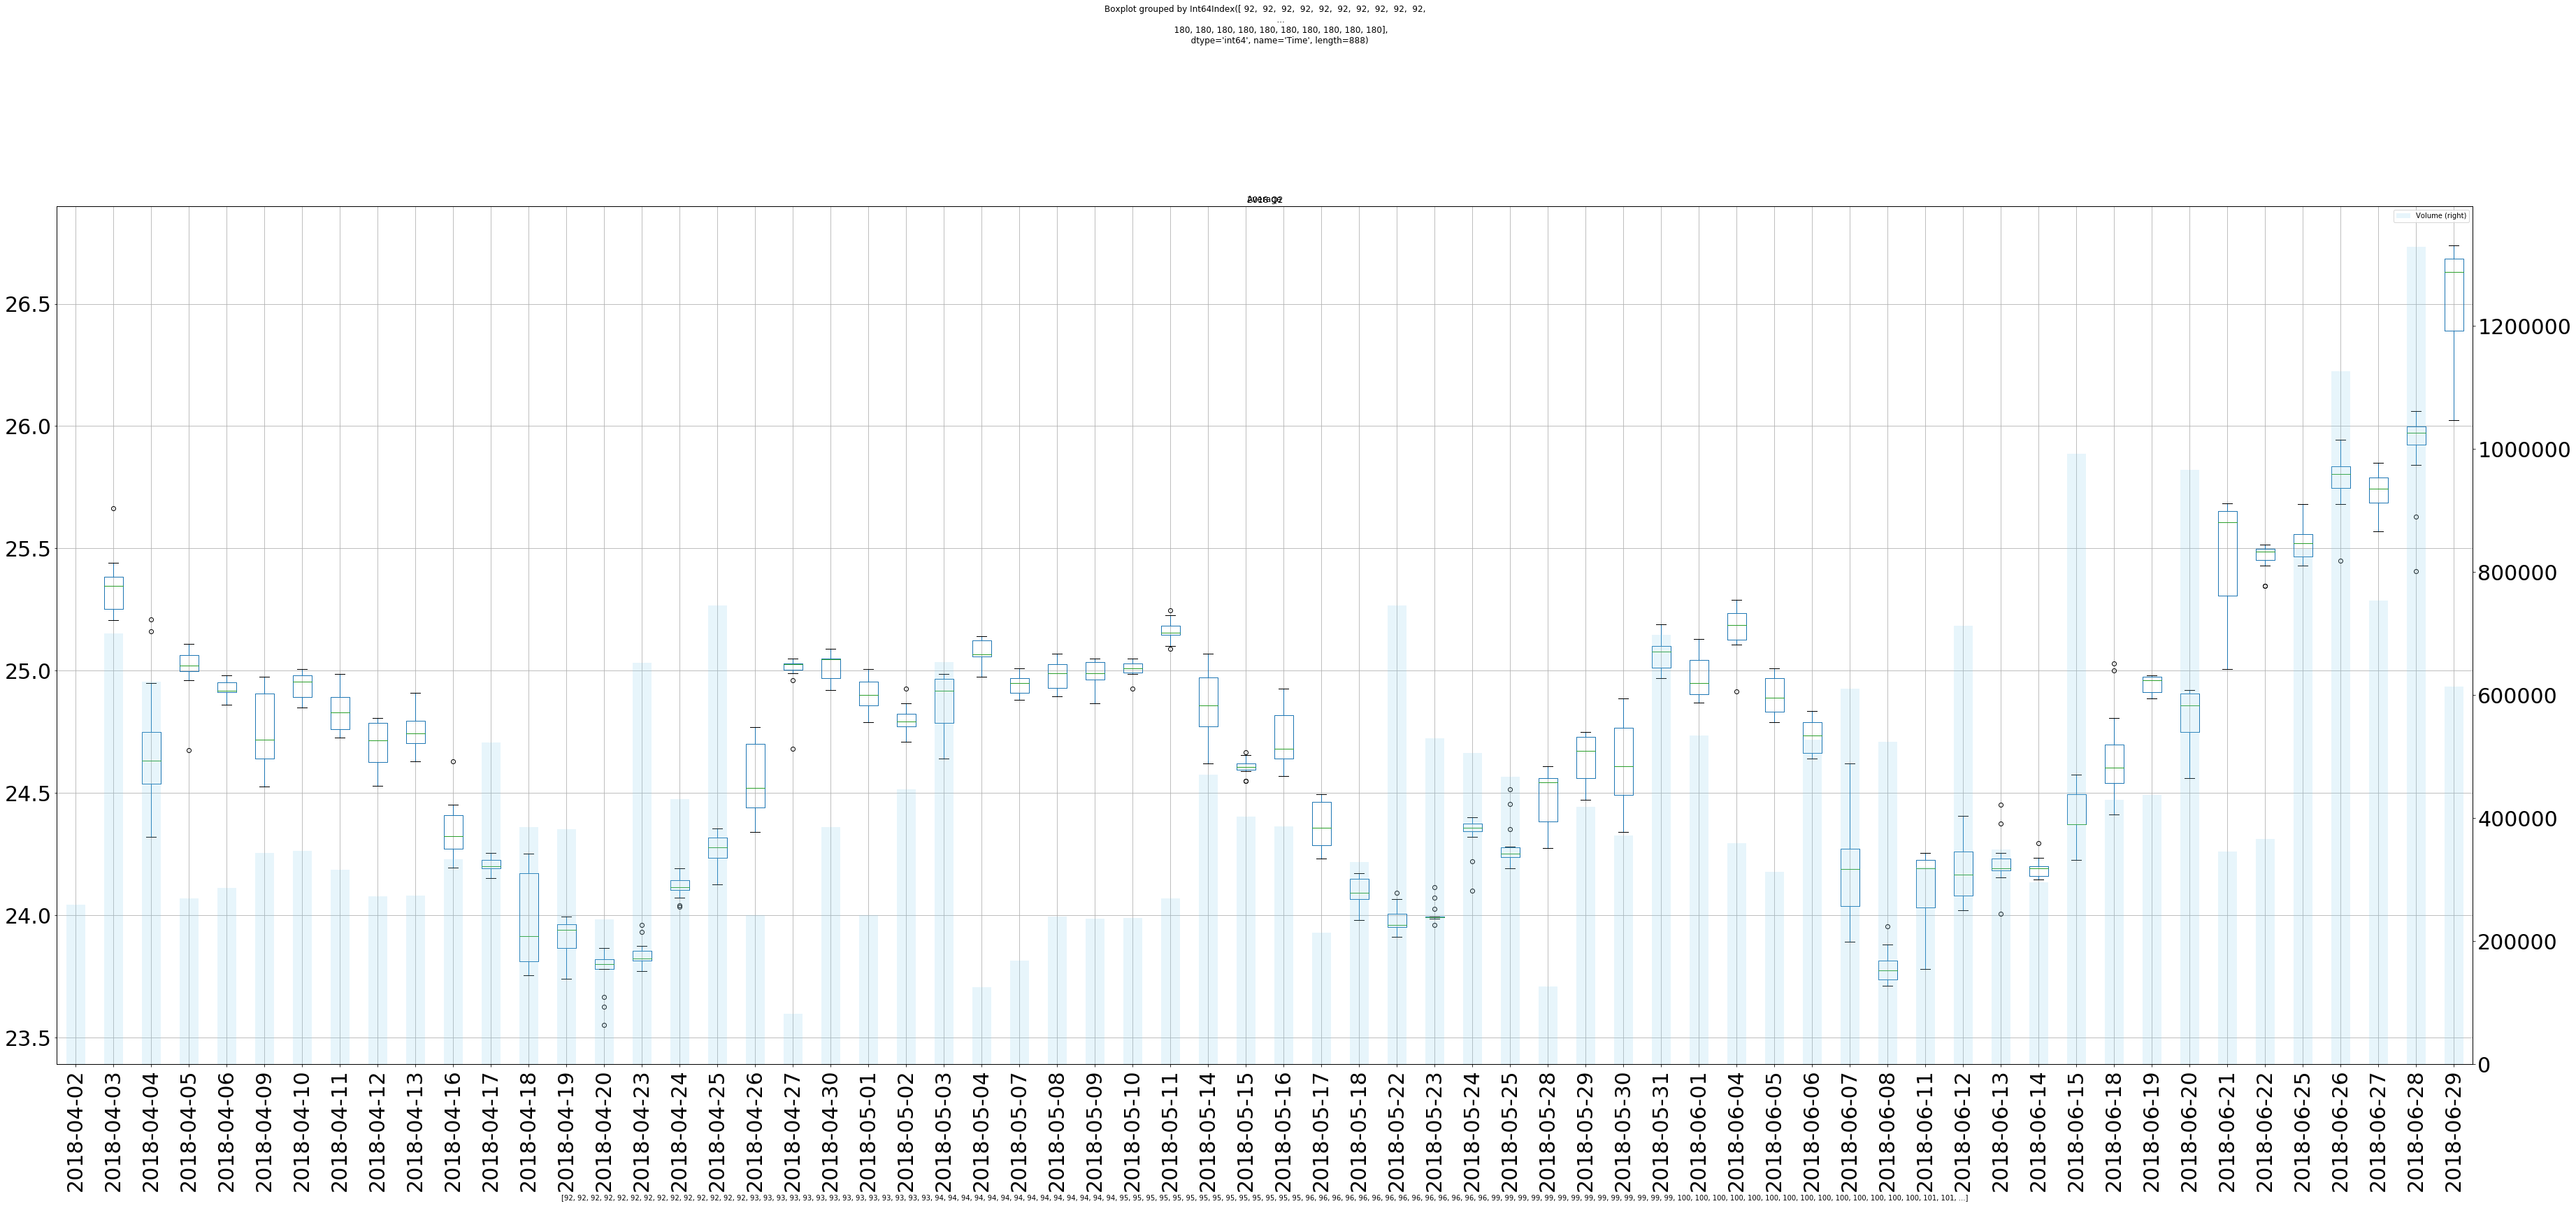

In [130]:

plt.rcParams.update({'axes.titlesize': 'large'})

#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()

ax1= fig.add_subplot(211)
#ax1.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

plt.title('2018 Q2', fontsize= 100)
plt.grid(b= True, axis= 'both')

#plt.suptitle('Volume')

sobey2018_Q2.boxplot(column='Average', 
                     by= sobey2018_Q2.index.dayofyear, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax1
                     )

ax2 = ax1.twinx()
plt.title('2018 Q2')

sobey2018_Q2_vol.groupby('doy').sum().plot.bar(y= 'Volume',
                                               color= 'skyblue', 
                                               figsize= [60, 50],
                                               rot= 90,
                                               fontsize= 30,
                                               ax= ax2,
                                               secondary_y= True,
                                               alpha= 0.2
                                              )
#plt.savefig('Sobey_2018_Q2.jpg')
plt.show()

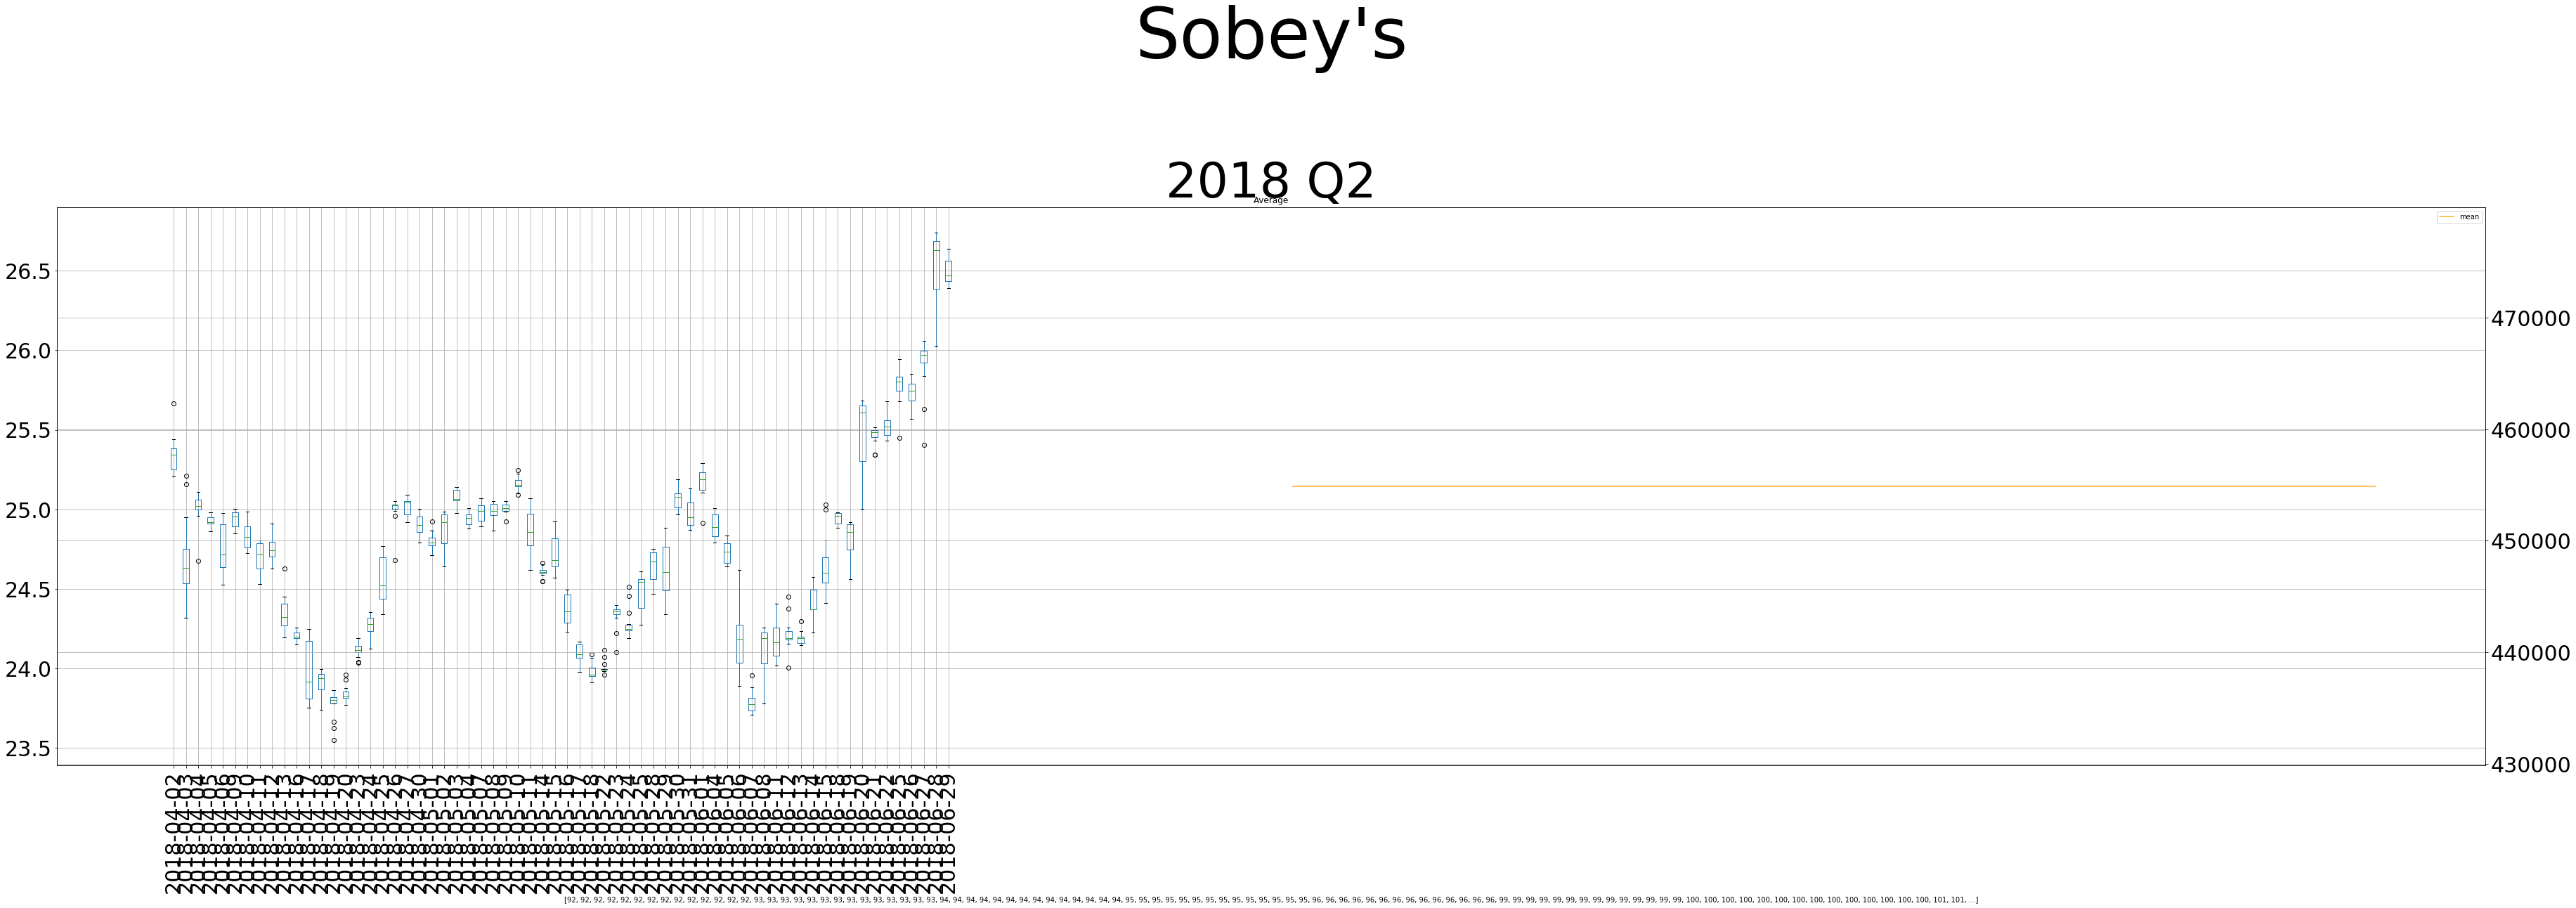

In [33]:
plt.rcParams.update({'axes.titlesize': 'large'})

#fig, ax1 = plt.subplots()
fig = plt.figure()
fig.add_axes()

ax1= fig.add_subplot(311)
#ax1.set_title('test title', fontdict={'fontsize': rcParams['axes.titlesize']})

sobey2018_Q2.boxplot(column='Average', 
                     by= sobey2018_Q2.index.dayofyear, 
                     figsize= [60, 50], 
                     rot= 90,
                     fontsize= 30,
                     ax= ax1
                     )

ax2 = ax1.twinx()

sobey2018_Q2_vol.groupby('doy').mean().plot(y= 'mean',
                                            color= 'orange', 
                                            figsize= [60, 50],
                                            rot= 90,
                                            fontsize= 30,
                                            ax= ax2,
                                            secondary_y= 'Volume',
                                            alpha= 0.9
                                           )
"""
sobey2018_Q2_vol.groupby('doy').sum().plot.bar(y= 'Volume',
                                               color= 'skyblue', 
                                               figsize= [60, 50],
                                               rot= 90,
                                               fontsize= 30,
                                               ax= ax2,
                                               secondary_y= True,
                                               alpha= 0.2
                                              )
"""


sobey2018_Q2_vol_date = sobey2018_Q2_vol.resample('D').sum()
sobey2018_Q2_vol_date = sobey2018_Q2_vol_date.loc[sobey2018_Q2_vol_date['Volume'] != 0]
xlabel = list(sobey2018_Q2_vol_date.index.date.astype('str'))
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[xlabel.pop(0) for d in locs]
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')

plt.title('2018 Q2', fontsize= 70)
plt.grid(b= True, axis= 'both')

plt.suptitle("Sobey's", fontsize= 100)

plt.savefig('Sobey_2018_Q2.pdf')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (888,)

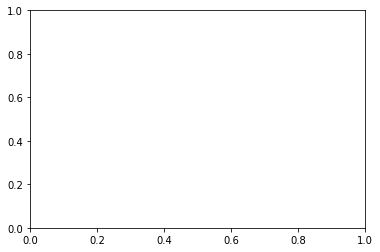

In [23]:
#a= np.average(sobey2018_Q2_vol.groupby('doy').sum())
#sobey2018_Q2_vol['mean']= a
plt.plot(sobey2018_Q2_vol.mean, sobey2018_Q2_vol.index.dayofyear)
plt.show()

In [24]:
sobey2018_Q2_vol['mean'].shape

(888,)

In [26]:
a

164634029.1671753

In [25]:
sobey2018_Q2_vol.index.dayofyear.shape

(888,)

In [6]:
sobey2018_Q2_vol['mean'] = np.average(sobey2018_Q2_vol.groupby('doy').sum())


In [7]:
sobey2018_Q2_vol.head()

Volume  doy       mean
Time                                       
2018-04-02 09:30:00   21500   92  454881.25
2018-04-02 10:00:00   17300   92  454881.25
2018-04-02 10:30:00   11900   92  454881.25
2018-04-02 11:00:00    8800   92  454881.25
2018-04-02 11:30:00   21100   92  454881.25

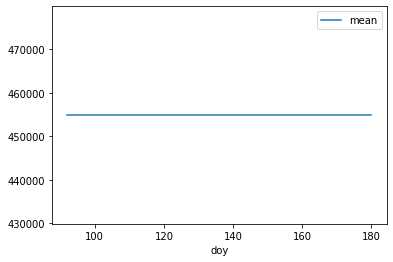

In [15]:
sobey2018_Q2_vol.groupby('doy').mean().plot(y= 'mean')
#sobey2018_Q2_vol.plot(y= 'mean')
plt.show()

In [10]:
assert sobey2018_Q2_vol['mean'].all == 454881.25

AssertionError: 

In [12]:
sobey2018_Q2_vol.describe()

Volume         doy       mean
count     888.000000  888.000000     888.00
mean    32784.234234  135.963964  454881.25
std     44839.861616   26.498832       0.00
min      1500.000000   92.000000  454881.25
25%     13175.000000  113.000000  454881.25
50%     21000.000000  136.000000  454881.25
75%     35550.000000  159.000000  454881.25
max    513100.000000  180.000000  454881.25

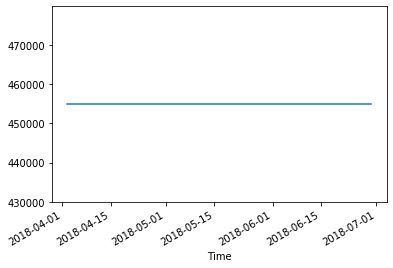

In [34]:
sobey2018_Q2_vol['mean'].plot()
plt.show()